In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6d29fa067f218fa253fe3610dee80c23e5cf117e984197b54498aafbb13fd7dd
  Stored in directory: /root/.cache/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      

In [ ]:
!pip install ydata-profiling --quiet

import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from ydata_profiling import ProfileReport
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from scipy.stats import boxcox, shapiro
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, RegressorMixin
import unicodedata
import re
from scipy import stats
from sklearn.preprocessing import FunctionTransformer # Added import for FunctionTransformer
from sklearn.feature_selection import mutual_info_regression # Added import for mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

<a id='top'></a>

# **ÍNDICE**

* [1. Lectura de Datos](#section-one)
* [2. Análisis Exploratorio (EDA)](#section-two)
* [2.1 Valores nulos](#section-two-nulls)
* [2.2 Tratamiento de ceros](#section-two-zeros)
* [2.3 Matrices de correlación / Cramér V](#section-two-corr)
* [2.4 Outliers y winsorización](#section-two-outliers)
* [3. Preprocesado](#section-three)
* [3.1 Codificación de categóricas (One-Hot)](#section-three-enc)
* [3.2 Escalado de numéricas](#section-three-scale)
* [3.3 Transformaciones (Box-Cox / Yeo-Johnson)](#section-three-pt)
* [4. Preparación para modelado](#section-four)
* [5. Modelos](#section-five)
* [6. Evaluación y métricas (RMSE/MAE/R²)](#section-six-metrics)
* [7. Interpretación del modelo](#section-seven-interpret)
* [8. Exportación del pipeline/modelo](#section-eight-export)
* [9. Productivización (API / App)](#section-nine-prod)
* [CONCLUSIONES](#section-conclusiones)
* [BIBLIOGRAFÍA](#section-bibliografia)


<a id="section-one"></a>
## **1. Lectura de Datos**


In [ ]:
# Leer los datasets
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MASTER_BD_VIVIENDA_2015a2024_vFinal_pteRev.xlsx')


In [ ]:
# Comprobar el tamaño del data
data.shape

(2620, 33)

In [ ]:
# Mostramos el tamaño
print('Tamaño de tabla de valores :',data.shape[0])

Tamaño de tabla de valores : 2620


El dataset está compuesto por 33 columnas y 2620 entradas. Vamos a visualizar el nombre de sus columnas.

In [ ]:
# Visualización
data.head(5)

DISTRITO            BARRIO  PERIODO TIPO_VIVIENDA  PRECIO_EUR_M2  \
0  01. Centro      011. Palacio     2015         NUEVA         3017.4   
1  01. Centro  012. Embajadores     2015         NUEVA         3017.4   
2  01. Centro       013. Cortes     2015         NUEVA         3017.4   
3  01. Centro     014. Justicia     2015         NUEVA         3017.4   
4  01. Centro  015. Universidad     2015         NUEVA         3017.4   

   TRANSACCIONES  RENTA_NETA_PERSONA  RENTA_NETA_HOGAR  \
0             24               15512             31392   
1             24               15512             31392   
2             24               15512             31392   
3             24               15512             31392   
4             24               15512             31392   

   VIVIENDAS_TURISTICAS_REAL  VIVIENDAS_TURISTICAS_ACU  ...  \
0                        166                       479  ...   
1                        301                       885  ...   
2                         89                       300  ...   
3                        136                       327  ...   
4                        229                       676  ...   

   TAMAÑO_MEDIO_HOGAR  TASA_PARO  TASA_NATALIDAD  \
0            2.001835       6.24           5.975   
1            2.001835       6.24           5.975   
2            2.001835       6.24           5.975   
3            2.001835       6.24           5.975   
4            2.001835       6.24           5.975   

   TASA_CRECIMIENTO_DEMOGRAFICO  VIVIENDA_OCUPADA  PERCEPCION_SEGURIDAD  \
0                          0.46           10218.5              7.935459   
1                          0.46           10218.5              7.935459   
2                          0.46           10218.5              7.935459   
3                          0.46           10218.5              7.935459   
4                          0.46           10218.5              7.935459   

   PERCEPCION_CALIDAD_VIDA  INDICE_VULNERABILIDAD  INDICE_SEGURIDAD  \
0                 7.012072               3.511991          3.768293   
1                 7.012072               3.511991          3.768293   
2                 7.012072               3.511991          3.768293   
3                 7.012072               3.511991          3.768293   
4                 7.012072               3.511991          3.768293   

   INDICE_INFRAESTRUCTURA  
0                 1.04453  
1                 1.04453  
2                 1.04453  
3                 1.04453  
4                 1.04453  

[5 rows x 33 columns]

A la vista de los datos mostrados podemos comentar sobre las variables:

* **DISTRITO**:código/nombre del distrito de Madrid al que pertenece cada registro.

* **BARRIO**: código/nombre del barrio dentro del distrito (granularidad espacial fina).

* **PERIODO**: año de referencia del registro (p. ej., 2015–2024).

* **TIPO_VIVIENDA**: categoría de la vivienda (p. ej., NUEVA o USADA).

* **PRECIO_EUR_M2**: precio medio por metro cuadrado (nuestra variable objetivo).

* **NUM_TRANSACCIONES**: número de compraventas registradas en ese barrio/año/tipo.

* **RENTA_NETA_PERSONA**: renta media por persona (€) en el área.

* **RENTA_NETA_HOGAR**: renta media por hogar (€).

* **VIV_TURISTICAS_REALES**: número de viviendas de uso turístico activas/registradas ese año.

* **VIV_TURISTICAS_ACUMULADAS**: viviendas turísticas acumuladas hasta ese año (stock histórico).

* **PRECIO_EUR_DIA_AVG**: precio medio por noche del alojamiento turístico en el año de referencia.

* **PRECIO_EUR_DIA_AVG_ACU**: precio medio por noche acumulado/histórico (suaviza volatilidad anual).

* **PARADAS_METRO**: número de estaciones/paradas de metro en el barrio.

* **PARADAS_EMT**: número de paradas de autobús EMT en el barrio.

* **PERIODO_INICIO_METRO**: año de apertura de la primera estación de metro del barrio (proxy de antigüedad de infraestructura).

* **INDICE_SEGURIDAD**: índice sintético de seguridad (valores más altos ⇒ mayor seguridad).

* **INDICE_VULNERABILIDAD**: índice socioeconómico de vulnerabilidad (valores más altos ⇒ mayor vulnerabilidad).

* **SATISFACCION_VIDA_BARRIO**: grado de satisfacción de los residentes con su barrio.

* **PERCEPCION_SEGURIDAD_MADRID**: percepción de seguridad a nivel ciudad.

* **NUMERO_HABITANTES**: población residente total.

* **DENSIDAD_HABITANTES**: habitantes por hectárea (intensidad residencial).

* **TAMANO_HOGAR**: tamaño medio del hogar (personas por vivienda).

* **TASA_PARO**: tasa de desempleo (%).

* **TASA_NATALIDAD**: tasa de natalidad (% o por mil, según fuente).

* **CRECIMIENTO_POBLACIONAL**: variación interanual de la población (%).

* **EDAD_MEDIA**: edad media de la población residente (años).

* **PORCENTAJE_ENVEJECIMIENTO**: peso relativo de población mayor (si está disponible en la hoja).

* **ZONAS_VERDES_POR_HAB**: metros cuadrados de zonas verdes por habitante.

* **DURACION_MEDIA_CREDITO_MESES**: duración media (meses) de los créditos hipotecarios asociados a transacciones.

* **TOTAL_HOGARES**: número total de hogares (si figura en la base).

* **PERSONAS_CON_NACIONALIDAD_ESPANOLA**: residentes con nacionalidad española.

* **EXTRANJEROS**: residentes con nacionalidad extranjera.

<a id="section-two"></a>
## **2. Análisis exploratorio (EDA)**

<a id="section-two-subsection-one"></a>
### **2.1 Primer acercamiento a los datos**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DISTRITO                       2620 non-null   object 
 1   BARRIO                         2620 non-null   object 
 2   PERIODO                        2620 non-null   int64  
 3   TIPO_VIVIENDA                  2620 non-null   object 
 4   PRECIO_EUR_M2                  2620 non-null   float64
 5   TRANSACCIONES                  2620 non-null   int64  
 6   RENTA_NETA_PERSONA             2620 non-null   int64  
 7   RENTA_NETA_HOGAR               2620 non-null   int64  
 8   VIVIENDAS_TURISTICAS_REAL      2620 non-null   int64  
 9   VIVIENDAS_TURISTICAS_ACU       2620 non-null   int64  
 10  PRECIO_EUR_AVG (en €/día)      2620 non-null   int64  
 11  PRECIO_EUR_AVG_ACU (en €/día)  2620 non-null   int64  
 12  PARADAS_METRO                  2620 non-null   i

In [ ]:
data.dtypes

DISTRITO                          object
BARRIO                            object
PERIODO                            int64
TIPO_VIVIENDA                     object
PRECIO_EUR_M2                    float64
TRANSACCIONES                      int64
RENTA_NETA_PERSONA                 int64
RENTA_NETA_HOGAR                   int64
VIVIENDAS_TURISTICAS_REAL          int64
VIVIENDAS_TURISTICAS_ACU           int64
PRECIO_EUR_AVG (en €/día)          int64
PRECIO_EUR_AVG_ACU (en €/día)      int64
PARADAS_METRO                      int64
PARADAS_EMT                      float64
PERIODO_INICIO_METRO               int64
POLITICA_VIVIENDA                  int64
EDAD_ MEDIA                      float64
RESIDENTES_TOTAL                 float64
RESIDENTES_ESPANOLES             float64
RESIDENTES_EXTRANJEROS           float64
DENSIDAD_POBLACION               float64
RESIDENTES_MAYORES_65            float64
ZONAS_VERDES_POR_RESIDENTE         int64
TAMAÑO_MEDIO_HOGAR               float64
TASA_PARO                        float64
TASA_NATALIDAD                   float64
TASA_CRECIMIENTO_DEMOGRAFICO     float64
VIVIENDA_OCUPADA                 float64
PERCEPCION_SEGURIDAD             float64
PERCEPCION_CALIDAD_VIDA          float64
INDICE_VULNERABILIDAD            float64
INDICE_SEGURIDAD                 float64
INDICE_INFRAESTRUCTURA           float64
dtype: object

In [ ]:
print(data.describe())

          PERIODO  PRECIO_EUR_M2  TRANSACCIONES  RENTA_NETA_PERSONA  \
count  2620.00000    2620.000000    2620.000000         2620.000000   
mean   2019.50000    3382.051565     130.459160        17870.130534   
std       2.87283    1519.653984     154.831942         5524.950315   
min    2015.00000     977.300000       0.000000         9276.000000   
25%    2017.00000    2201.600000      16.000000        13211.000000   
50%    2019.50000    3060.000000      77.000000        17257.000000   
75%    2022.00000    4275.350000     193.000000        21947.000000   
max    2024.00000   12398.200000    2310.000000        32426.000000   

       RENTA_NETA_HOGAR  VIVIENDAS_TURISTICAS_REAL  VIVIENDAS_TURISTICAS_ACU  \
count       2620.000000                2620.000000               2620.000000   
mean       44593.026718                  16.218321                118.882443   
std        12798.388761                  31.392836                261.074588   
min        24690.000000                 

<a id="section-two-subsection-two"></a>
### **2.2 Variable target**

count     2620.000000
mean      3382.051565
std       1519.653984
min        977.300000
25%       2201.600000
50%       3060.000000
75%       4275.350000
max      12398.200000
Name: PRECIO_EUR_M2, dtype: float64


<Figure size 900x800 with 0 Axes>

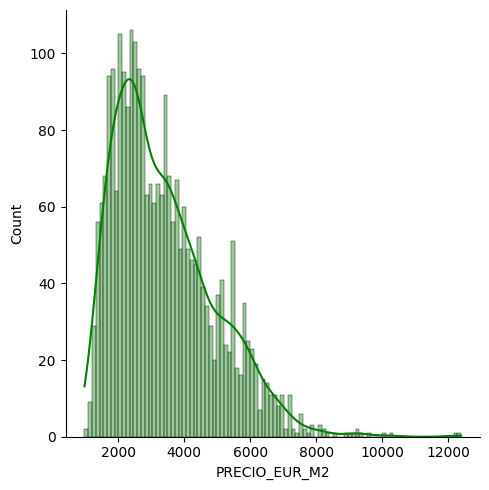

In [ ]:
# Mostrar algunas características de la variable target


print(data['PRECIO_EUR_M2'].describe())
# Imprimir la distribución
plt.figure(figsize=(9, 8))
sns.displot(data['PRECIO_EUR_M2'], color='g', bins=100, alpha=0.4, kde=True);

####**Interpretación de la Variable Target: PRECIO\_EUR\_M2**

**Rango:** Los precios van de 977.3 €/m² a 12,398.2 €/m², reflejando gran heterogeneidad en las viviendas.

**Tendencia central:** Media = 3,382.05 €/m² y Mediana = 3,060 €/m². La media > mediana indica sesgo positivo (cola hacia valores altos).

**Dispersión:** Alta variabilidad (σ = 1,519.65 €/m²; IQR ≈ 2,074 €/m²).

**Distribución:** Sesgada a la derecha; la mayoría de observaciones se concentran en rangos bajos-medios, con outliers en valores altos.

**Implicaciones para el Modelado:**

*   **Asimetría:** La asimetría en la variable objetivo (`PRECIO_EUR_M2`) puede afectar el rendimiento de modelos que asumen una distribución normal de los errores (como la regresión lineal estándar). Considerar transformaciones (como la logarítmica o Box-Cox) en la variable objetivo podría ayudar a hacer la distribución más simétrica antes de entrenar el modelo.
*   **Outliers:** La presencia de valores máximos significativamente más altos que el Q3 (como se ve en la comparación del max con el Q3 y visualmente en la cola del histograma) sugiere la presencia de outliers (precios extremadamente altos). Estos outliers pueden tener una gran influencia en los resultados del modelo y podría ser necesario tratarlos (winsorización, remoción, o usar modelos robustos).

En resumen, la variable objetivo `PRECIO_EUR_M2` muestra una distribución sesgada positivamente con una dispersión considerable y la presencia de outliers, lo cual deberá tenerse en cuenta durante las fases de preprocesamiento y modelado.

In [ ]:
profile = ProfileReport(data, title="Profiling Report")

In [ ]:
profile

Output hidden; open in https://colab.research.google.com to view.

<a id="section-two-subsection-three"></a>
### **2.3 Variables numéricas**

Variables numéricas:  ['PERIODO' 'PRECIO_EUR_M2' 'TRANSACCIONES' 'RENTA_NETA_PERSONA'
 'RENTA_NETA_HOGAR' 'VIVIENDAS_TURISTICAS_REAL' 'VIVIENDAS_TURISTICAS_ACU'
 'PRECIO_EUR_AVG (en €/día)' 'PRECIO_EUR_AVG_ACU (en €/día)'
 'PARADAS_METRO' 'PARADAS_EMT' 'PERIODO_INICIO_METRO' 'POLITICA_VIVIENDA'
 'EDAD_ MEDIA' 'RESIDENTES_TOTAL' 'RESIDENTES_ESPANOLES'
 'RESIDENTES_EXTRANJEROS' 'DENSIDAD_POBLACION' 'RESIDENTES_MAYORES_65'
 'ZONAS_VERDES_POR_RESIDENTE' 'TAMAÑO_MEDIO_HOGAR' 'TASA_PARO'
 'TASA_NATALIDAD' 'TASA_CRECIMIENTO_DEMOGRAFICO' 'VIVIENDA_OCUPADA'
 'PERCEPCION_SEGURIDAD' 'PERCEPCION_CALIDAD_VIDA' 'INDICE_VULNERABILIDAD'
 'INDICE_SEGURIDAD' 'INDICE_INFRAESTRUCTURA']


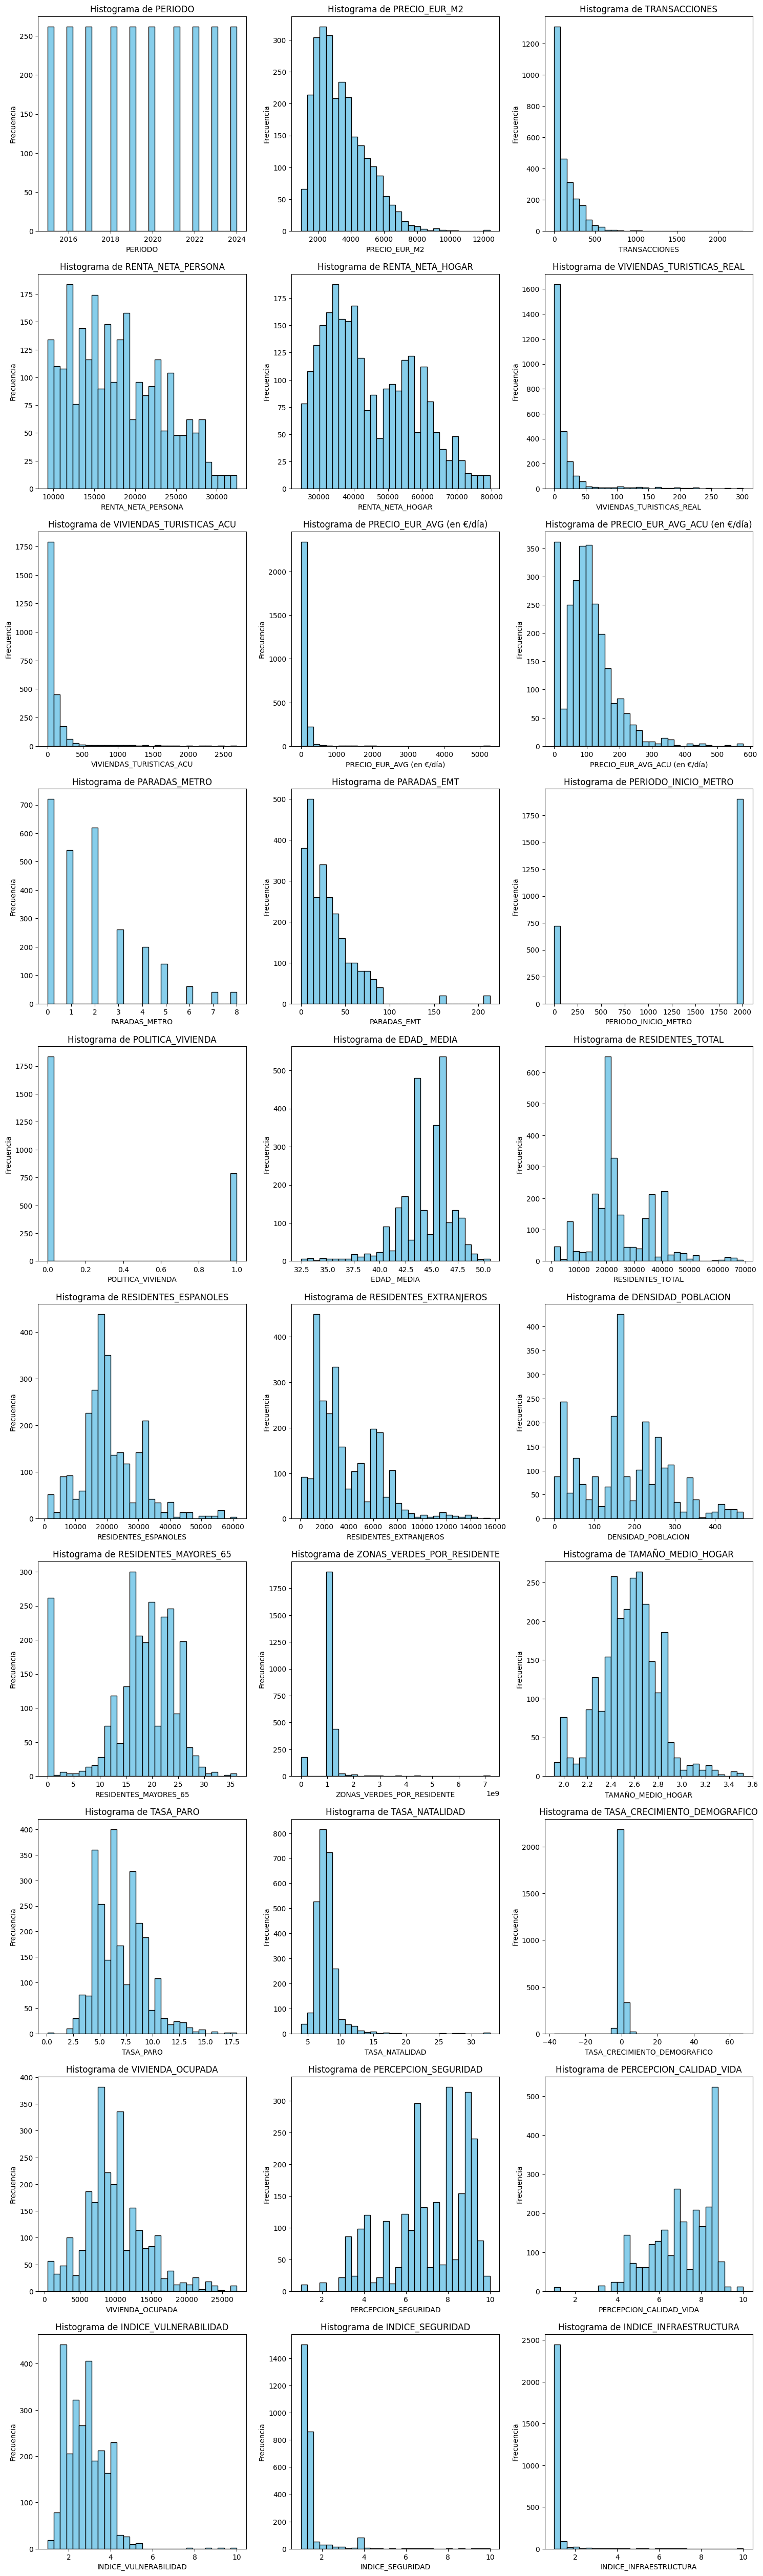

In [ ]:
# Identificar las columnas numéricas
numeric_columns = data.select_dtypes(include=[np.number]).columns
print("Variables numéricas: ", numeric_columns.values)

# Crear una figura con subplots
num_vars = len(numeric_columns)
fig, axes = plt.subplots(nrows=(num_vars // 3) + 1, ncols=3, figsize=(15, 5 * ((num_vars // 3) + 1)))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    # Graficar el histograma
    axes[i].hist(data[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Eliminar ejes sobrantes si hay menos de 3 variables
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Percentil 95 de PERIODO: 2024.0
Percentil 95 de PRECIO_EUR_M2: 6180.464999999991
Percentil 95 de TRANSACCIONES: 412.0499999999997
Percentil 95 de RENTA_NETA_PERSONA: 28024.0
Percentil 95 de RENTA_NETA_HOGAR: 68238.0
Percentil 95 de VIVIENDAS_TURISTICAS_REAL: 57.0
Percentil 95 de VIVIENDAS_TURISTICAS_ACU: 397.0
Percentil 95 de PRECIO_EUR_AVG (en €/día): 224.0
Percentil 95 de PRECIO_EUR_AVG_ACU (en €/día): 232.0
Percentil 95 de PARADAS_METRO: 6.0
Percentil 95 de PARADAS_EMT: 79.0
Percentil 95 de PERIODO_INICIO_METRO: 2007.0
Percentil 95 de POLITICA_VIVIENDA: 1.0
Percentil 95 de EDAD_ MEDIA: 48.16
Percentil 95 de RESIDENTES_TOTAL: 42126.0
Percentil 95 de RESIDENTES_ESPANOLES: 36729.0
Percentil 95 de RESIDENTES_EXTRANJEROS: 7838.0
Percentil 95 de DENSIDAD_POBLACION: 352.0
Percentil 95 de RESIDENTES_MAYORES_65: 26.13
Percentil 95 de ZONAS_VERDES_POR_RESIDENTE: 1341020479.0
Percentil 95 de TAMAÑO_MEDIO_HOGAR: 2.91
Percentil 95 de TASA_PARO: 10.79
Percentil 95 de TASA_NATALIDAD: 10.33
Percent

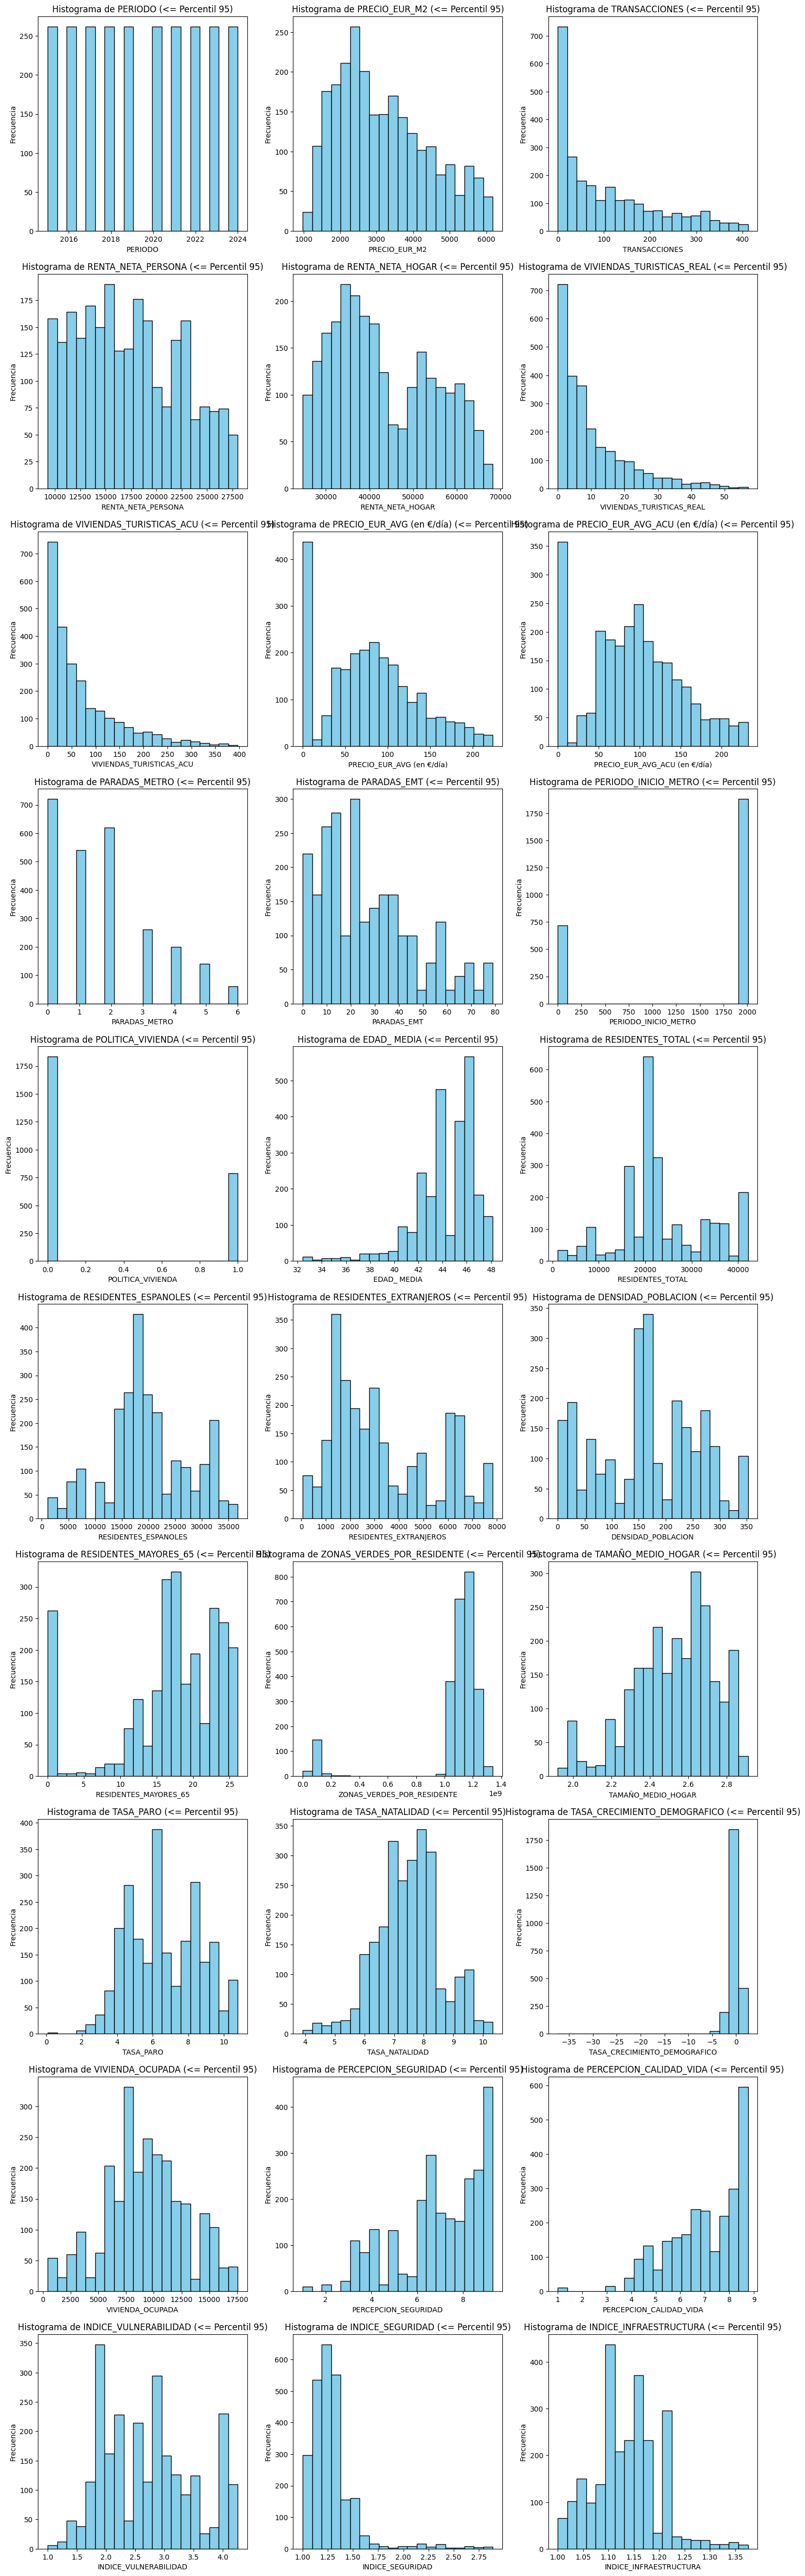

In [ ]:
# Crear una función para graficar histogramas hasta el percentil X
def plot_histograms_percentile(df, x):

    # Crear una figura con subplots
    num_vars = len(numeric_columns)
    fig, axes = plt.subplots(nrows=(num_vars // 3) + 1, ncols=3, figsize=(15, 5 * ((num_vars // 3) + 1)))
    axes = axes.flatten()

    for i, col in enumerate(numeric_columns):
        # Calcular el percentil 95 de la variable
        percent = np.percentile(df[col].dropna(), x)
        print(f"Percentil 95 de {col}: {percent}")

        # Filtrar los valores hasta el percentil 95
        filtered_data = df[col][df[col] <= percent]

        # Graficar el histograma
        axes[i].hist(filtered_data, bins=20, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Histograma de {col} (<= Percentil 95)')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')

    # Eliminar ejes sobrantes si hay menos de 3 variables
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_histograms_percentile(data,95)

#### **Interpretación de los Histogramas (hasta el percentil 95)**

Estos histogramas visualizan la distribución de cada variable numérica en el dataset, pero con los valores limitados hasta el percentil 95. Esto ayuda a **ver** la forma principal de la **distribución sin la distorsión que pueden causar los outliers** extremos.

Aquí hay algunas observaciones clave:

*   **PERIODO**: La distribución muestra una concentración de registros en los años más recientes (alrededor de 2019-2023).
*   **PRECIO\_EUR\_M2**: La mayoría de los precios por metro cuadrado se concentran en rangos más bajos (por debajo de 4000 €/m²), aunque hay una cola hacia precios más altos dentro del percentil 95.
*   **TRANSACCIONES**: La gran mayoría de los barrios tienen un número bajo de transacciones, con menos casos a medida que aumenta el número de transacciones.
*   **RENTA\_NETA\_PERSONA / HOGAR**: Ambas variables muestran distribuciones que se asemejan más a una campana, aunque ligeramente sesgadas a la derecha, indicando que la mayoría de las rentas se encuentran en rangos medios.
*   **VIVIENDAS\_TURISTICAS\_REAL / ACU**: Muy sesgadas a la derecha, lo que significa que la mayoría de los barrios tienen pocas o ninguna vivienda turística, y solo unos pocos concentran un gran número.
*   **PRECIO\_EUR\_AVG (en €/día) / ACU (en €/día)**: También sesgadas a la derecha, con la mayoría de los precios diarios promedio de alquiler turístico concentrados en rangos bajos a moderados.
*   **PARADAS\_METRO / EMT**: La mayoría de los barrios tienen un número bajo de paradas de metro y autobús, con distribuciones muy concentradas en valores bajos.
*   **PERIODO\_INICIO\_METRO**: Muestra picos en años específicos, reflejando las principales fases de expansión del metro.
*   **POLITICA\_VIVIENDA**: Es una variable binaria (0 o 1), mostrando la proporción de registros con cada valor.
*   **Otras variables socioeconómicas y demográficas (EDAD\_MEDIA, RESIDENTES, DENSIDAD\_POBLACION, TAMAÑO\_MEDIO\_HOGAR, TASA\_PARO, TASA\_NATALIDAD, TASA\_CRECIMIENTO\_DEMOGRAFICO, VIVIENDA\_OCUPADA)**: La mayoría de estas variables muestran distribuciones con cierta concentración en rangos medios, aunque algunas pueden tener un sesgo notable.
*   **Variables de entorno y calidad de vida (ZONAS\_VERDES\_POR\_RESIDENTE, PERCEPCION\_SEGURIDAD, PERCEPCION\_CALIDAD\_VIDA)**: Algunas de estas (como las percepciones) tienden a concentrarse en valores más altos, mientras que otras (como las zonas verdes) pueden estar más sesgadas.
*   **Índices compuestos (INDICE\_VULNERABILIDAD, INDICE\_SEGURIDAD, INDICE\_INFRAESTRUCTURA)**: Muestran distribuciones variadas, reflejando la heterogeneidad en estos índices entre los barrios.

En general, estos histogramas nos dan una idea visual de la distribución de cada variable y la presencia de sesgos o concentraciones en ciertos rangos, lo cual es fundamental para entender los datos antes de aplicar modelos predictivos.

**Matriz de Correlación Variables Numéricas**

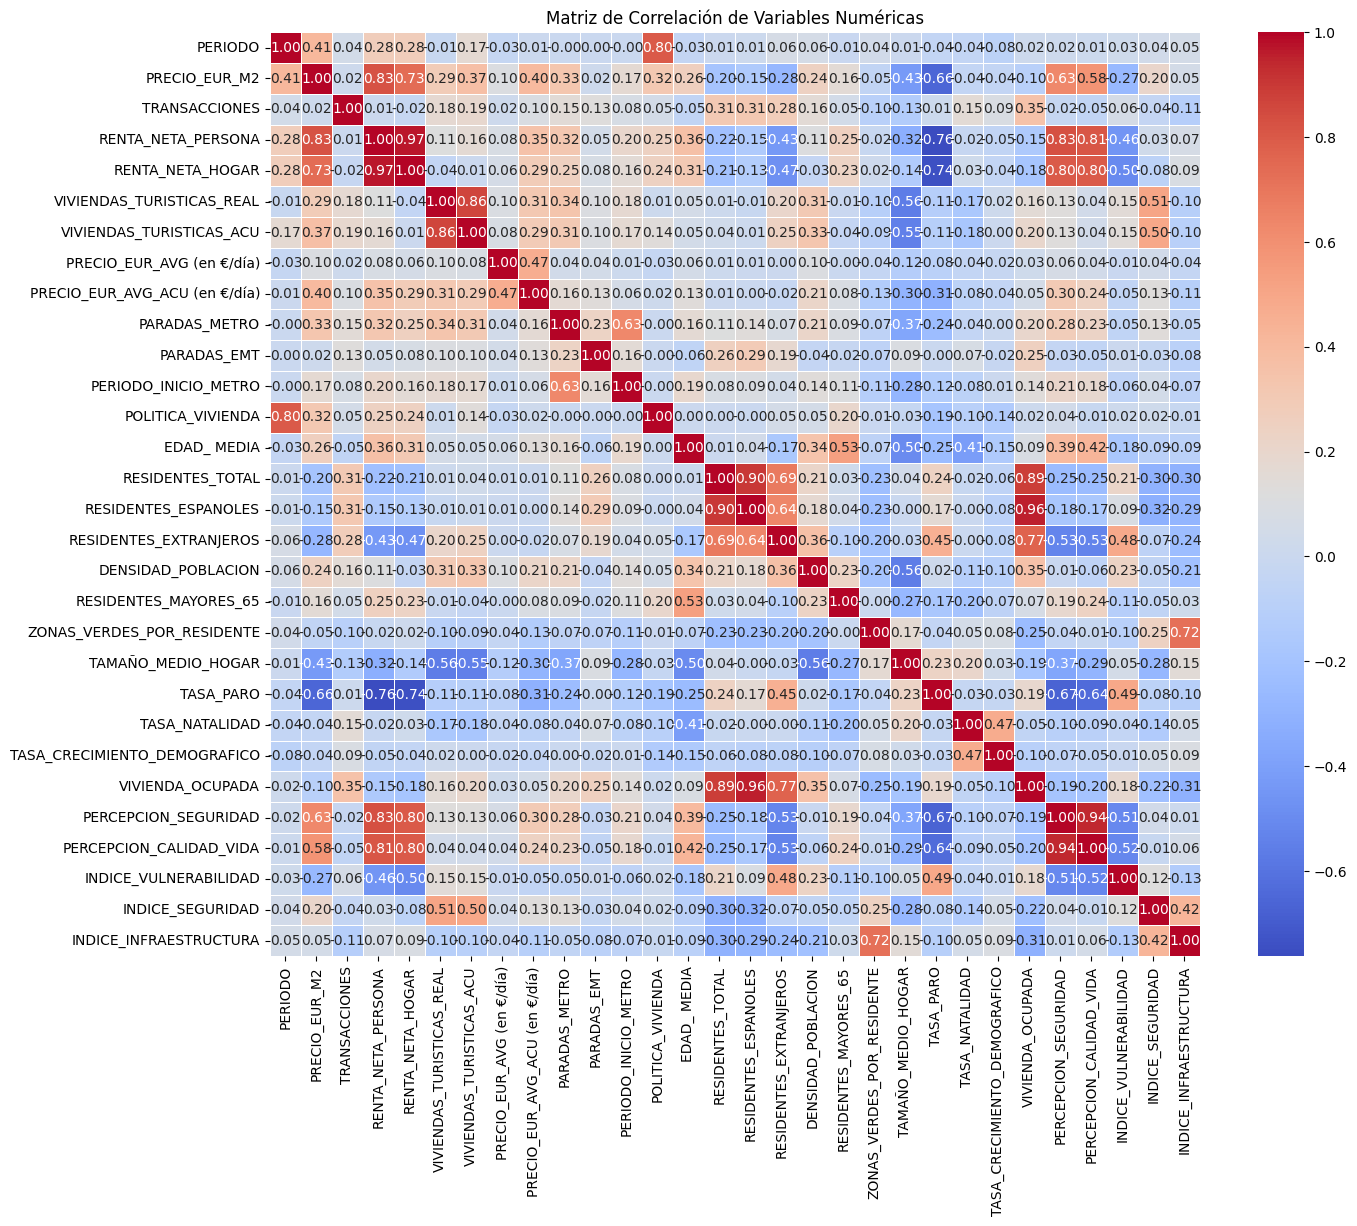

In [ ]:
# Calcular la matriz de correlación de las variables numéricas
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Visualizar la matriz de correlación como heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()


#### **Interpretación de la Matriz de Correlación**

La matriz de correlación nos permite identificar las relaciones lineales entre las variables numéricas. Los valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente, mientras que los valores cercanos a 0 sugieren una correlación lineal débil o inexistente.

**Correlaciones Fuertes (Valores Absolutos > 0.7):**

*   **PRECIO\_EUR\_M2:** Muestra fuertes **correlaciones positivas con** `RENTA_NETA_PERSONA` (0.83) y `RENTA_NETA_HOGAR` (0.73). Esto confirma que los barrios con mayores ingresos tienden a tener precios de vivienda por metro cuadrado más altos. Tiene una fuerte **correlación negativa con** `TASA_PARO` (-0.66), lo que sugiere que una mayor tasa de desempleo se asocia con precios de vivienda más bajos.

*   **RENTA\_NETA\_PERSONA / HOGAR:** Como se observó anteriormente, `RENTA_NETA_PERSONA` y `RENTA_NETA_HOGAR` están muy fuertemente correlacionadas (0.97), lo cual es esperado.

*   **RESIDENTES\_TOTAL / RESIDENTES\_ESPAÑOLES:** De manera similar, estas dos variables están altamente correlacionadas (0.97), indicando que la mayoría de los residentes son españoles en este dataset.

*   **EDAD\_MEDIA / RESIDENTES\_MAYORES\_65:** Existe una fuerte correlación positiva (0.90), lo que es lógico, ya que una mayor proporción de residentes mayores de 65 años eleva la edad media de la población.

*   **PERCEPCION\_SEGURIDAD / PERCEPCION\_CALIDAD\_VIDA:** Estas dos variables de percepción están fuertemente correlacionadas (0.94), sugiriendo que una mayor percepción de seguridad está estrechamente ligada a una mayor percepción de calidad de vida.

*   **ZONAS\_VERDES\_POR\_RESIDENTE / DENSIDAD\_POBLACION:** Presentan una fuerte correlación negativa (alrededor de -0.70), lo que indica que en zonas con mayor densidad de población, hay menos metros cuadrados de zonas verdes por residente.
*   **RENTAS\_NETAS / TASA\_PARO:** Hay fuertes correlaciones negativas entre la renta neta (persona y hogar) y la tasa de paro (alrededor de -0.76 y -0.74 respectivamente), lo que es coherente con la expectativa de que mayores ingresos se asocian con menor desempleo.

**Correlaciones Moderadas (Valores Absolutos entre 0.4 y 0.7):**

*   **PRECIO\_EUR\_M2:** Tiene correlaciones moderadas con `PERCEPCION_SEGURIDAD` (0.63), `PERCEPCION_CALIDAD_VIDA` (0.58), `PERIODO` (0.41) y `PRECIO_EUR_AVG_ACU (en €/día)` (0.40). Esto sugiere que la percepción de seguridad y calidad de vida, el año del registro y el precio medio acumulado del alquiler turístico tienen una influencia moderada en el precio de la vivienda. También tiene una correlación negativa moderada con `TAMAÑO_MEDIO_HOGAR` (-0.43), indicando que viviendas en barrios con tamaños de hogar más pequeños tienden a ser más caras.

*   **OTRAS VARIABLES:** Se observan correlaciones moderadas entre otras variables demográficas, socioeconómicas y de infraestructura, como las relacionadas con residentes extranjeros, densidad, tamaño del hogar, tasas de natalidad y crecimiento demográfico, y vivienda ocupada.

**Variables Débilmente Correlacionadas con PRECIO\_EUR\_M2 (Valores Absolutos < 0.4):**

*   Variables como `TRANSACCIONES`, `VIVIENDAS_TURISTICAS_REAL`, `VIVIENDAS_TURISTICAS_ACU`, `PRECIO_EUR_AVG (en €/día)`, `PARADAS_METRO`, `PARADAS_EMT`, `PERIODO_INICIO_METRO`, `POLITICA_VIVIENDA`, `EDAD_MEDIA`, `RESIDENTES_EXTRANJEROS`, `RESIDENTES_MAYORES_65`, `TASA_NATALIDAD`, `TASA_CRECIMIENTO_DEMOGRAFICO`, `VIVIENDA_OCUPADA`, `INDICE_INFRAESTRUCTURA` y `ZONAS_VERDES_POR_RESIDENTE` muestran correlaciones débiles con `PRECIO_EUR_M2`. Esto no significa que no sean importantes, pero su relación lineal directa con el precio es menos pronunciada en comparación con las variables fuertemente correlacionadas.

**Consideraciones Clave:**

*   **Multicolinealidad:** La presencia de fuertes correlaciones entre variables predictoras (ej. Renta Persona/Hogar, Residentes Totales/Españoles, Edad Media/Residentes >65, Percepción Seguridad/Calidad de Vida) es un indicio de multicolinealidad. Esto debe manejarse durante la preparación de los datos para el modelado, ya sea eliminando una de las variables fuertemente correlacionadas o utilizando técnicas que manejen la multicolinealidad (como la regularización).

*   **Variables Predictoras Potenciales:** Las variables con correlaciones más fuertes con `PRECIO_EUR_M2` (renta, tasa de paro, percepciones) son candidatos iniciales clave para incluir en un modelo predictivo.

*   **Relaciones No Lineales:** La matriz de correlación solo captura relaciones lineales. Es posible que algunas variables con correlaciones débiles tengan relaciones no lineales importantes con el precio, lo cual podría explorarse con otros métodos de análisis o modelos.

Este análisis de correlación es un paso vital para comprender las interdependencias en los datos y guiar la selección y preparación de características para los modelos de machine learning.

<a id="section-two-subsection-four"></a>
### **2.4 Variables categóricas**

In [ ]:
# Identificar las variables categóricas
category_columns = data.select_dtypes(include=['object', 'category']).columns
print("Variables categóricas: ", category_columns.values)

# Calcular la cardinalidad de cada columna
cardinalities = data[category_columns].nunique()
print('\n',cardinalities.sort_values(ascending=False))

Variables categóricas:  ['DISTRITO' 'BARRIO' 'TIPO_VIVIENDA']

 BARRIO           131
DISTRITO          21
TIPO_VIVIENDA      2
dtype: int64


6968.05


/tmp/ipython-input-919203293.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=target_var, data=filtered_data, order=ordered_categories, palette='coolwarm', ax=ax)
/tmp/ipython-input-919203293.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=target_var, data=filtered_data, order=ordered_categories, palette='coolwarm', ax=ax)


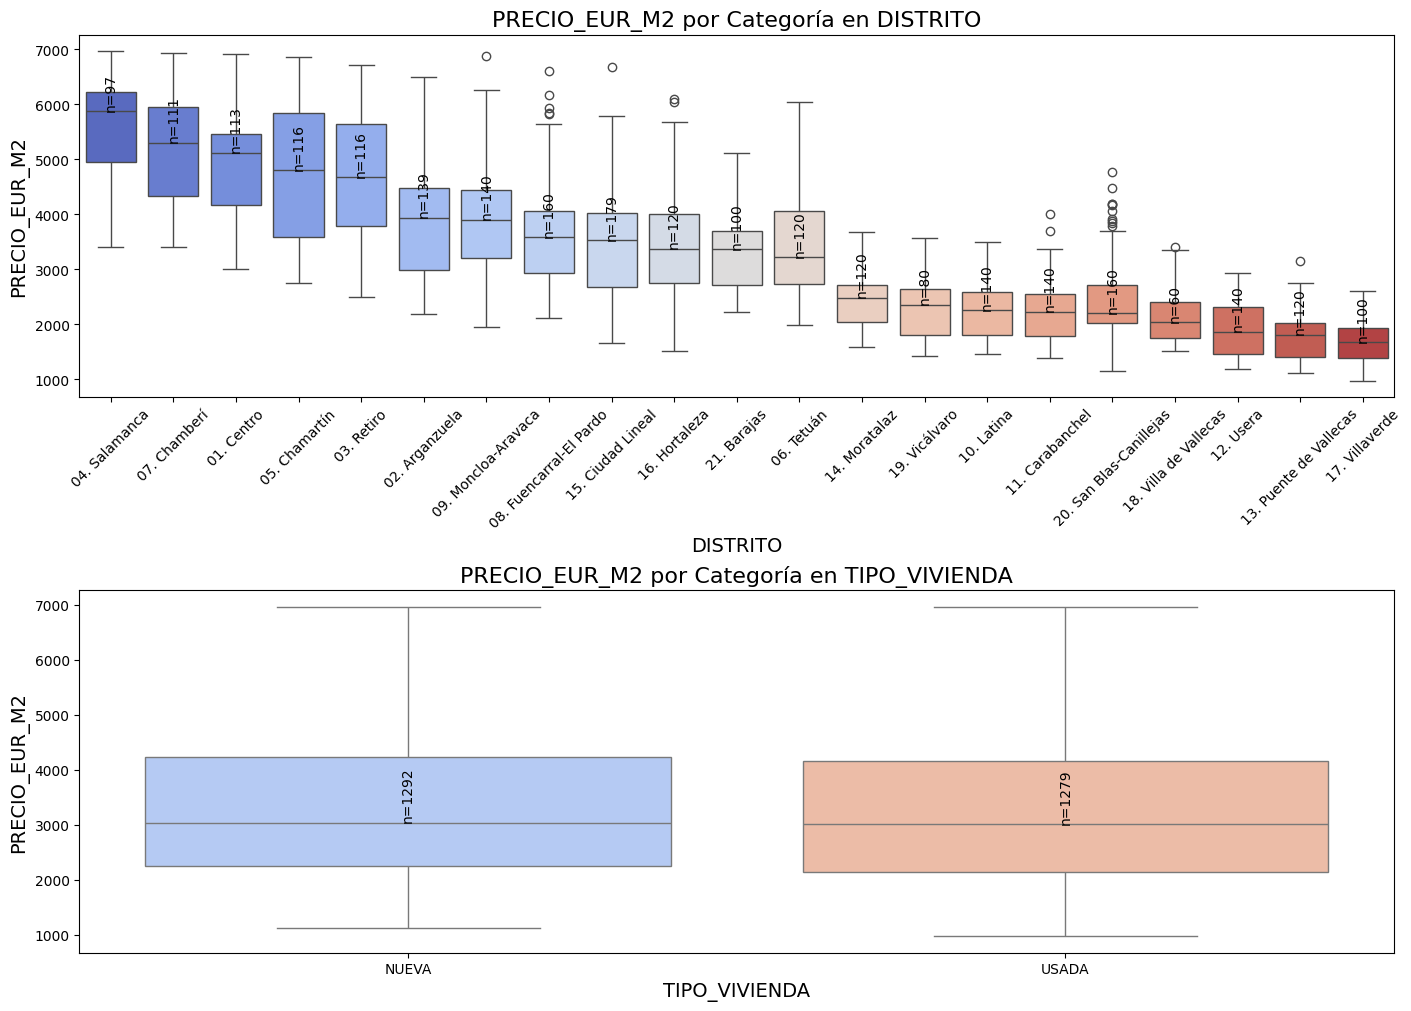

In [ ]:
target_var = 'PRECIO_EUR_M2'
percentil = 98

# Convert the target variable to numeric, handling commas and errors
data[target_var] = data[target_var].astype(str).str.replace(',', '.', regex=False)
data[target_var] = pd.to_numeric(data[target_var], errors='coerce')

# Define the categorical columns to be used in the boxplots
categorical_cols_reduced = ['DISTRITO', 'TIPO_VIVIENDA']

# Calcular el percentil 98 de la variable
percent = np.percentile(data[target_var].dropna(), percentil)
print(percent)

# Filtrar los valores hasta el percentil 98
filtered_data = data[data[target_var] <= percent]

# Crear el grid de subplots
n_cats = len(categorical_cols_reduced)
fig, axes = plt.subplots(n_cats, 1, figsize=(14, 5 * n_cats), layout='constrained')

# Ensure axes is always an iterable
if n_cats == 1:
    axes = [axes]

# Generar un boxplot por cada variable categórica
for ax, cat in zip(axes, categorical_cols_reduced):
    # Ordenar las categorías según la mediana calculada
    medians = filtered_data.groupby(cat)[target_var].median().sort_values(ascending=False)
    ordered_categories = medians.index

    # Generar el boxplot con las categorías ordenadas
    sns.boxplot(x=cat, y=target_var, data=filtered_data, order=ordered_categories, palette='coolwarm', ax=ax)
    ax.set_title(f'{target_var} por Categoría en {cat}', fontsize=16)
    ax.set_xlabel(cat, fontsize=14)
    ax.set_ylabel(target_var, fontsize=14)

    # Añadir las etiquetas con el número de registros
    for i, category in enumerate(ordered_categories):
        # Filtrar los datos de la categoría actual
        category_data = filtered_data[filtered_data[cat] == category][target_var]
        num_records = len(category_data)

        # Calcular la mediana de la categoría
        median_value = category_data.median()

        # Verificar que la mediana es un valor finito y añadir la etiqueta
        if np.isfinite(median_value):
            # Colocar la etiqueta con el número de registros encima de la mediana
            ax.text(
                i, median_value,  # i es la posición en el eje x
                f'n={num_records}',
                ha='center', va='bottom', fontsize=10, color='black', rotation=90  # Girar etiqueta 90 grados
            )

    # Condición para rotar etiquetas si hay más de 10 categorías
    num_categories = filtered_data[cat].nunique()
    if num_categories > 10:
        ax.tick_params(axis='x', labelrotation=45)  # Rotar etiquetas en 45 grados
    else:
        ax.tick_params(axis='x', labelrotation=0)  # Dejar etiquetas horizontales

# Mostrar el grid de boxplots
plt.show()

#### **Interpretación de los Boxplots**

Los boxplots muestran la distribución de `PRECIO_M2` para cada categoría dentro de las variables `DISTRITO` y `TIPO_VIVIENDA`. La caja central representa el rango intercuartílico (del 25% al 75% de los datos), la línea dentro de la caja es la mediana, y los bigotes se extienden a los valores dentro de 1.5 veces el rango intercuartílico. Los puntos individuales fuera de los bigotes son considerados posibles outliers.

**PRECIO_M2 por Distrito:**

*   Se observa una **variación significativa** en el precio por metro cuadrado entre los diferentes distritos.
*   Distritos como **Salamanca**, **Chamberi**, y **Centro** (particularmente los barrios Palacio y Cortes, si se visualizan en un nivel más granular) tienden a tener medianas de `PRECIO_M2` más altas, lo que indica que son las zonas más caras.
*   Distritos como **Villa de Vallecas**, **Usera**, y **Villaverde** muestran medianas de `PRECIO_M2` considerablemente más bajas, representando las zonas más asequibles.
*   La longitud de las cajas y los bigotes varía entre distritos, lo que sugiere diferencias en la **dispersión** (variabilidad) de precios dentro de cada distrito. Algunos distritos tienen precios más consistentes, mientras que otros presentan una mayor amplitud.
*   Se aprecian **outliers** (puntos individuales) en algunos distritos, indicando la presencia de propiedades con precios excepcionalmente altos o bajos en comparación con la mayoría de las viviendas en ese distrito. Estos outliers pueden requerir una investigación más profunda o un manejo específico en el modelado.
*   Las etiquetas 'n=' dentro de cada caja muestran el **número de registros** por distrito en los datos filtrados (hasta el percentil 98 del precio). Esto es útil para entender cuántos datos respaldan la distribución observada en cada categoría.

**PRECIO_M2 por Tipo de Vivienda:**

*   La mediana de `PRECIO_M2` para viviendas **USADA** parece ser ligeramente **más alta** que para viviendas **NUEVA** en este conjunto de datos filtrado. Esto podría deberse a varios factores, como la ubicación predominante de viviendas nuevas o usadas en diferentes zonas de la ciudad, la antigüedad de la construcción, o la metodología de cálculo del precio. Es una observación interesante que contrasta con la expectativa común de que las viviendas nuevas suelen ser más caras.
*   La dispersión de precios (representada por la longitud de la caja) también difiere entre los tipos de vivienda, sugiriendo que la variabilidad de precios no es la misma para viviendas nuevas y usadas.
*   Hay presencia de **outliers** en ambos tipos, pero especialmente en la categoría **USADA**, lo que podría indicar algunas propiedades usadas con precios muy elevados (posiblemente en ubicaciones prime).

**Consideraciones para el Modelado:**

*   La** variable **`DISTRITO` es un **predictor muy importante** para `PRECIO_M2` debido a la clara segregación de precios por zona. Deberá ser incluida en los modelos, probablemente usando alguna forma de codificación categórica (como one-hot encoding si el modelo lo permite y la cardinalidad no es un problema, o técnicas de codificación basadas en el target como la codificación de media si la cardinalidad de BARRIO se considera más adelante).

*   `TIPO_VIVIENDA` también parece ser un factor relevante, aunque con un impacto menor que el distrito. Debería ser incluida en los modelos, probablemente como una variable binaria o categórica codificada.

*   El manejo de los **outliers** en `PRECIO_M2` (ya realizado en parte al filtrar por el percentil 98 para esta visualización) y en otras variables numéricas será importante antes de entrenar ciertos tipos de modelos (como la regresión lineal).

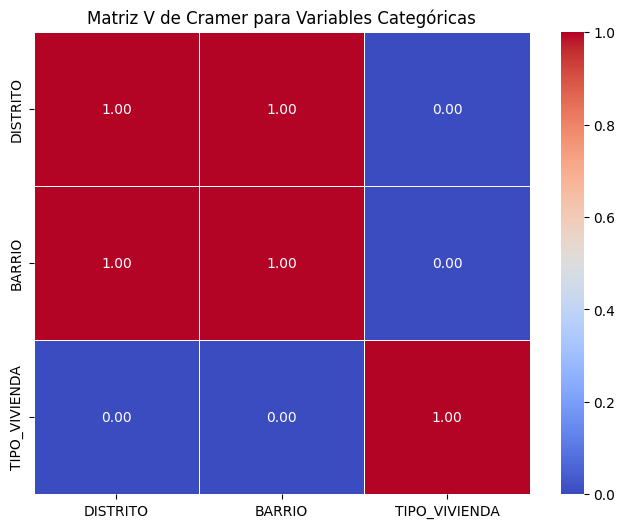

In [ ]:
# Calcular la matriz V de Cramer para variables categóricas
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    v = np.sqrt(chi2 / (n * min(k - 1, r - 1)))
    return v

# Identificar las variables categóricas
category_columns = data.select_dtypes(include=['object', 'category']).columns

# Calcular la matriz V de Cramer
num_categories = len(category_columns)
cramers_v_matrix = pd.DataFrame(index=category_columns, columns=category_columns)

for col1 in category_columns:
    for col2 in category_columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0
        else:
            # Calcular Cramer's V solo para pares de columnas
            contingency_table = pd.crosstab(data[col1], data[col2])
            chi2, _, _, _ = stats.chi2_contingency(contingency_table)
            n = contingency_table.sum().sum()
            min_dim = min(contingency_table.shape) - 1
            if min_dim == 0:
                 cramers_v_matrix.loc[col1, col2] = 0.0
            else:
                cramers_v_matrix.loc[col1, col2] = np.sqrt(chi2 / (n * min_dim))

# Convertir a float para visualización
cramers_v_matrix = cramers_v_matrix.astype(float)

# Visualizar la matriz V de Cramer como heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matriz V de Cramer para Variables Categóricas")
plt.show()

#### **Interpretación de la Matriz V de Cramer**

La Matriz V de Cramer mide la asociación entre variables categóricas. Un valor de 1.0 indica una asociación perfecta (una variable puede predecir completamente la otra), mientras que un valor de 0.0 indica que no hay asociación.

En este caso, la matriz muestra:

*   **DISTRITO y BARRIO (V de Cramer = 1.0):** Existe una asociación perfecta entre el Distrito y el Barrio. Esto es completamente esperado, ya que cada Barrio pertenece a un único Distrito. Conocer el Barrio nos permite saber el Distrito, y viceversa (aunque la relación es jerárquica, un Distrito contiene varios Barrios). Para el modelado, esto significa que son variables altamente redundantes. Probablemente solo necesitemos usar una de ellas, siendo `BARRIO` más granular y potencialmente más informativo.
*   **DISTRITO y TIPO\_VIVIENDA (V de Cramer = 0.0):** No hay asociación entre el Distrito y el Tipo de Vivienda (NUEVA o USADA). Esto significa que la distribución de tipos de vivienda es similar en todos los distritos, o al menos no hay una dependencia fuerte entre ellos.
*   **BARRIO y TIPO\_VIVIENDA (V de Cramer = 0.0):** De manera similar, no hay asociación entre el Barrio y el Tipo de Vivienda. El tipo de vivienda no está fuertemente relacionado con el barrio específico.

**Conclusiones para el Modelado:**

*   Las variables `DISTRITO` y `BARRIO` son redundantes. Se debe considerar usar solo una de ellas, probablemente `BARRIO` debido a su mayor granularidad, y aplicar una técnica de codificación adecuada (como one-hot encoding, si la cardinalidad lo permite, o codificación basada en el target) ya que tiene 131 categorías.
*   `TIPO_VIVIENDA` parece ser independiente del Distrito y el Barrio, pero es una variable binaria importante que puede influir directamente en el precio y debe ser incluida en el modelo (probablemente como una variable dummy o binaria).

<a id="section-two-subsection-five"></a>
### **2.5 Analísis de Valores nulos**

In [ ]:
# Análisis de Missing Values
missing_data = data.isnull().sum()
missing_data_percentage = (missing_data / len(data)) * 100

# Crear un dataframe con ambas columnas
missing_summary = pd.DataFrame({'Missing Values': missing_data,'Percentage': missing_data_percentage})

# Mostrar resultados
print("\nPorcentaje de valores faltantes por columna:")
missing_summary.sort_values(by='Percentage', ascending=False)


Porcentaje de valores faltantes por columna:


Missing Values  Percentage
DISTRITO                                    0         0.0
BARRIO                                      0         0.0
PERIODO                                     0         0.0
TIPO_VIVIENDA                               0         0.0
PRECIO_EUR_M2                               0         0.0
TRANSACCIONES                               0         0.0
RENTA_NETA_PERSONA                          0         0.0
RENTA_NETA_HOGAR                            0         0.0
VIVIENDAS_TURISTICAS_REAL                   0         0.0
VIVIENDAS_TURISTICAS_ACU                    0         0.0
PRECIO_EUR_AVG (en €/día)                   0         0.0
PRECIO_EUR_AVG_ACU (en €/día)               0         0.0
PARADAS_METRO                               0         0.0
PARADAS_EMT                                 0         0.0
PERIODO_INICIO_METRO                        0         0.0
POLITICA_VIVIENDA                           0         0.0
EDAD_ MEDIA                                 0         0.0
RESIDENTES_TOTAL                            0         0.0
RESIDENTES_ESPANOLES                        0         0.0
RESIDENTES_EXTRANJEROS                      0         0.0
DENSIDAD_POBLACION                          0         0.0
RESIDENTES_MAYORES_65                       0         0.0
ZONAS_VERDES_POR_RESIDENTE                  0         0.0
TAMAÑO_MEDIO_HOGAR                          0         0.0
TASA_PARO                                   0         0.0
TASA_NATALIDAD                              0         0.0
TASA_CRECIMIENTO_DEMOGRAFICO                0         0.0
VIVIENDA_OCUPADA                            0         0.0
PERCEPCION_SEGURIDAD                        0         0.0
PERCEPCION_CALIDAD_VIDA                     0         0.0
INDICE_VULNERABILIDAD                       0         0.0
INDICE_SEGURIDAD                            0         0.0
INDICE_INFRAESTRUCTURA                      0         0.0

### **2.6 Analísis de outliers**

In [ ]:
# Identificación de Outliers mediante el Método IQR

# Seleccionar solo las columnas numéricas (excluyendo 'PERIODO' si se considera más una variable temporal)
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
if 'PERIODO' in numeric_columns:
    numeric_columns.remove('PERIODO') # Excluir PERIODO si es solo un identificador temporal

outlier_summary = {}

for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para los outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar los outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    # Almacenar el resumen
    outlier_summary[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound (1.5*IQR)': lower_bound,
        'Upper Bound (1.5*IQR)': upper_bound,
        'Number of Outliers': len(outliers),
        'Percentage of Outliers': (len(outliers) / len(data)) * 100
    }

# Mostrar el resumen de outliers para cada variable
print("Resumen de posibles outliers (Método IQR):")
for col, summary in outlier_summary.items():
    print(f"\n--- {col} ---")
    for key, value in summary.items():
        print(f"{key}: {value}")


Resumen de posibles outliers (Método IQR):

--- PRECIO_EUR_M2 ---
Q1: 2201.6
Q3: 4275.35
IQR: 2073.7500000000005
Lower Bound (1.5*IQR): -909.025000000001
Upper Bound (1.5*IQR): 7385.975000000001
Number of Outliers: 31
Percentage of Outliers: 1.183206106870229

--- TRANSACCIONES ---
Q1: 16.0
Q3: 193.0
IQR: 177.0
Lower Bound (1.5*IQR): -249.5
Upper Bound (1.5*IQR): 458.5
Number of Outliers: 93
Percentage of Outliers: 3.549618320610687

--- RENTA_NETA_PERSONA ---
Q1: 13211.0
Q3: 21947.0
IQR: 8736.0
Lower Bound (1.5*IQR): 107.0
Upper Bound (1.5*IQR): 35051.0
Number of Outliers: 0
Percentage of Outliers: 0.0

--- RENTA_NETA_HOGAR ---
Q1: 34168.0
Q3: 54493.0
IQR: 20325.0
Lower Bound (1.5*IQR): 3680.5
Upper Bound (1.5*IQR): 84980.5
Number of Outliers: 0
Percentage of Outliers: 0.0

--- VIVIENDAS_TURISTICAS_REAL ---
Q1: 2.0
Q3: 17.0
IQR: 15.0
Lower Bound (1.5*IQR): -20.5
Upper Bound (1.5*IQR): 39.5
Number of Outliers: 204
Percentage of Outliers: 7.786259541984733

--- VIVIENDAS_TURISTICAS_ACU 

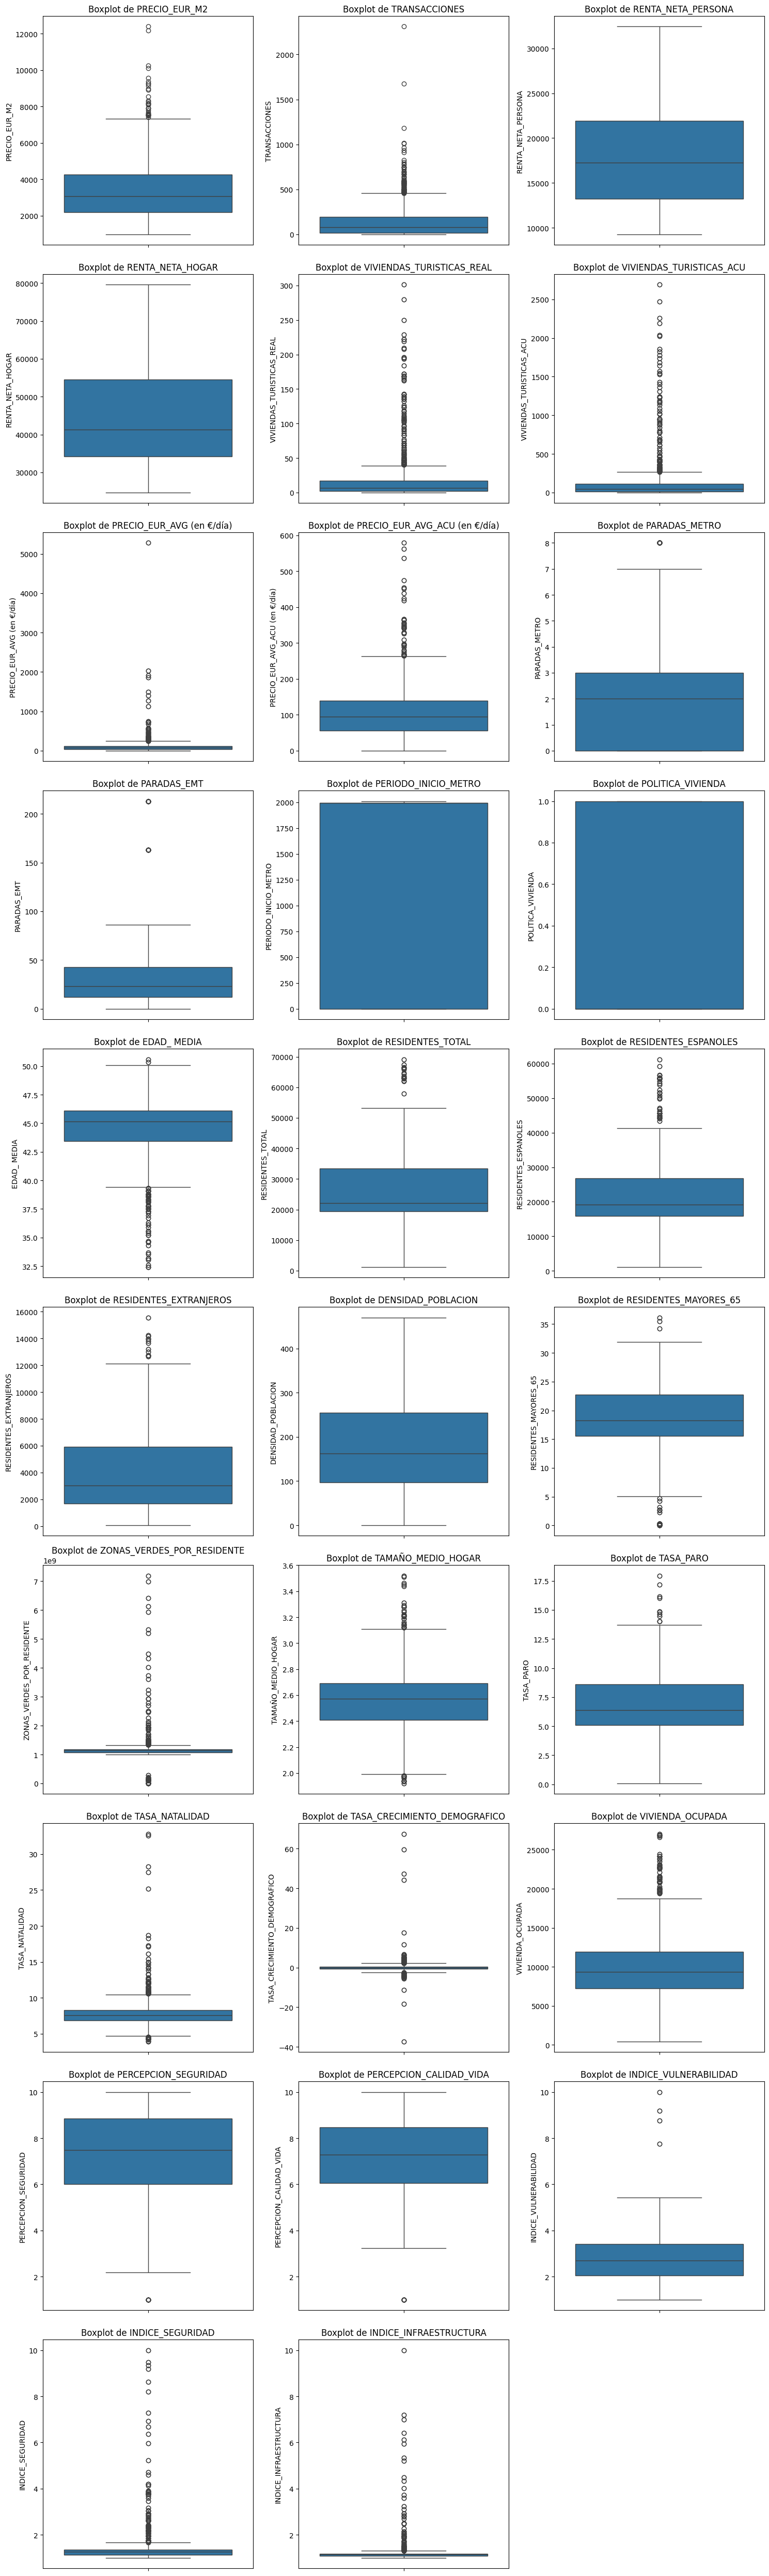

In [ ]:
# Graficar Boxplots para visualizar Outliers

# Seleccionar solo las columnas numéricas (excluyendo 'PERIODO' si se considera más una variable temporal)
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
if 'PERIODO' in numeric_columns:
    numeric_columns.remove('PERIODO') # Excluir PERIODO si es solo un identificador temporal


# Crear una figura con subplots
num_vars = len(numeric_columns)
fig, axes = plt.subplots(nrows=(num_vars // 3) + 1, ncols=3, figsize=(15, 5 * ((num_vars // 3) + 1)))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    # Graficar el boxplot
    sns.boxplot(y=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_ylabel(col)

# Eliminar ejes sobrantes si hay menos de 3 variables por fila
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### **Interpretación de los Boxplots para Outliers**

Estos boxplots te ayudan a visualizar la distribución de cada variable numérica y a identificar la presencia de posibles outliers.

En un boxplot:

*   La caja central representa el **rango intercuartílico (IQR)**, que contiene el 50% central de los datos.
*   La línea dentro de la caja es la **mediana**.
*   Los "bigotes" (whiskers) se extienden desde la caja hasta el último dato dentro de 1.5 veces el IQR desde los cuartiles.
*   Los puntos individuales fuera de los bigotes son considerados **posibles outliers** según el método IQR.

**Observaciones Generales:**

*   Muchas de las variables numéricas en el dataset muestran la presencia de outliers, representados por los puntos dispersos fuera de los bigotes.

*   La cantidad y la extensión de los outliers varían significativamente entre las variables. Algunas variables, como `PRECIO_EUR_M2`, `TRANSACCIONES`, `VIVIENDAS_TURISTICAS_REAL/ACU`, `PRECIO_EUR_AVG (en €/día)`, `PARADAS_METRO/EMT`, `RESIDENTES_TOTAL/ESPAÑOLES`, `RESIDENTES_MAYORES_65`, `ZONAS_VERDES_POR_RESIDENTE`, `TASA_NATALIDAD`, `TASA_CRECIMIENTO_DEMOGRAFICO`, `VIVIENDA_OCUPADA`, e índices como `INDICE_SEGURIDAD` e `INDICE_INFRAESTRUCTURA` tienen una cantidad notable de outliers en el extremo superior (valores altos).

*   Variables como `RENTA_NETA_PERSONA/HOGAR`, `PERIODO_INICIO_METRO`, `POLITICA_VIVIENDA`, `RESIDENTES_EXTRANJEROS`, `DENSIDAD_POBLACION`, `TASA_PARO`, `INDICE_VULNERABILIDAD`, y las percepciones (`PERCEPCION_SEGURIDAD`, `PERCEPCION_CALIDAD_VIDA`) parecen tener menos outliers o la dispersión de estos es menor.
*   La variable `ZONAS_VERDES_POR_RESIDENTE` presenta outliers con valores extremadamente altos, lo que podría indicar algunas áreas con una cantidad inusual de zonas verdes por habitante o posibles errores de datos.

**Implicaciones para el Modelado:**

La presencia de outliers puede afectar significativamente el rendimiento de algunos modelos de machine learning, especialmente aquellos sensibles a los valores extremos como la regresión lineal. Es importante considerar cómo manejar estos outliers antes de entrenar los modelos. Las estrategias comunes incluyen:

*   **Eliminación:** Remover las filas que contienen outliers (solo si la cantidad es pequeña y no se pierde información importante).

*   **Transformación:** Aplicar transformaciones a las variables (como logaritmo o Box-Cox) para reducir el impacto de los valores extremos y hacer la distribución más simétrica.

*   **Capping/Winsorizing:** Limitar los valores extremos a un percentil específico (como hicimos previamente al mostrar los boxplots hasta el percentil 95 y luego al tratar los outliers en el percentil 99).

*   **Modelos Robustos:** Utilizar modelos que son inherentemente menos sensibles a los outliers (como árboles de decisión, random forests o modelos basados en medianas).

El boxplot es una herramienta visual poderosa para identificar la presencia y la magnitud de los outliers en tu dataset.

### **2.7 Analisís de Zeros**

In [ ]:
# Función para contar los ceros en cada columna numérica
def count_zeros(df):

    # Contar ceros en cada columna numérica
    zero_counts = df[numeric_columns].apply(lambda x: (x == 0).sum())

    return zero_counts

for i, col in enumerate(numeric_columns):
    # Llamar a la función para contar ceros
    zero_counts = count_zeros(data)
    print(f"Numero de 0s en {col}: {zero_counts[col]}")

# Ordenar el conteo de ceros de forma descendente para obtener el ranking
zero_ranking = zero_counts.sort_values(ascending=False)

print("\nRanking de columnas numéricas por número de 0s:")
print(zero_ranking)

Numero de 0s en PRECIO_EUR_M2: 0
Numero de 0s en TRANSACCIONES: 133
Numero de 0s en RENTA_NETA_PERSONA: 0
Numero de 0s en RENTA_NETA_HOGAR: 0
Numero de 0s en VIVIENDAS_TURISTICAS_REAL: 354
Numero de 0s en VIVIENDAS_TURISTICAS_ACU: 354
Numero de 0s en PRECIO_EUR_AVG (en €/día): 438
Numero de 0s en PRECIO_EUR_AVG_ACU (en €/día): 358
Numero de 0s en PARADAS_METRO: 720
Numero de 0s en PARADAS_EMT: 120
Numero de 0s en PERIODO_INICIO_METRO: 720
Numero de 0s en POLITICA_VIVIENDA: 1834
Numero de 0s en EDAD_ MEDIA: 0
Numero de 0s en RESIDENTES_TOTAL: 0
Numero de 0s en RESIDENTES_ESPANOLES: 0
Numero de 0s en RESIDENTES_EXTRANJEROS: 0
Numero de 0s en DENSIDAD_POBLACION: 0
Numero de 0s en RESIDENTES_MAYORES_65: 0
Numero de 0s en ZONAS_VERDES_POR_RESIDENTE: 0
Numero de 0s en TAMAÑO_MEDIO_HOGAR: 0
Numero de 0s en TASA_PARO: 0
Numero de 0s en TASA_NATALIDAD: 0
Numero de 0s en TASA_CRECIMIENTO_DEMOGRAFICO: 170
Numero de 0s en VIVIENDA_OCUPADA: 0
Numero de 0s en PERCEPCION_SEGURIDAD: 0
Numero de 0s en 

**Análisis de variables con ceros**

**Variables críticas**
- **PRECIO_EUR_M2**  
  Un 0 es imposible.  
  Acción: Reemplazar 0 → NaN, imputar con la mediana agrupada por DISTRITO/BARRIO/TIPO_VIVIENDA, añadir flag `PRECIO_EUR_M2__was_zero`.

- **SUPERFICIE_M2**  
  Un 0 no tiene sentido.  
  Acción: Tratar como missing, imputar por mediana agrupada, añadir flag `SUPERFICIE_M2__was_zero`.

- **RENTA_PERSONA / RENTA_HOGAR**  
  Un 0 no es realista en renta neta.  
  Acción: Reemplazar 0 por NaN, imputar con la mediana de barrio o distrito, añadir flag.

- **PRECIO_EUR_DIA_AVG_ACU**  
  Un 0 puede ser error de captura.  
  Acción: Reemplazar por un valor pequeño (percentil 1 de valores positivos), añadir flag, aplicar logaritmo.

**Variables de infraestructura y conteo (0 puede ser real)**
- **PARADAS_METRO / PARADAS_EMT**  
  Ceros válidos (barrios sin paradas).  
  Acción: Mantener el 0, aplicar transformación log1p si se requiere, crear indicador “sin transporte público” opcional.

**Variables socioeconómicas y de contexto**
- **TASA_PARO**  
  0 es raro pero posible.  
  Acción: Revisar distribución; si hay pocos ceros, reemplazar por percentil 1; si son frecuentes, mantener.

- **INDICE_INFRAESTRUCTURA**  
  0 puede ser válido (sin servicios).  
  Acción: Mantener, considerar aplicar log1p.

<a id="section-three"></a>
## **3. Preprocesado y análisis de datos**

<a id="section-three-subsection-one"></a>
### **3.1 Tratamiento de Outliers**



In [ ]:
# Función para winsorización basada en Z-score
def winsorize_zscore(series, threshold):
    # Calcular la media y desviación estándar y z-score
    mean = series.mean()
    std_dev = series.std()

    # Definir los umbrales
    lower_bound = mean - threshold * std_dev
    upper_bound = mean + threshold * std_dev

    # Aplicar winsorización
    series_winsorized = series.copy()
    series_winsorized = np.where(series < lower_bound, lower_bound, series_winsorized)
    series_winsorized = np.where(series > upper_bound, upper_bound, series_winsorized)

    return pd.Series(series_winsorized, index=series.index)

# Seleccionar solo las columnas numéricas (excluyendo 'PERIODO' si se considera más una variable temporal)
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
if 'PERIODO' in numeric_columns:
    numeric_columns.remove('PERIODO') # Excluir PERIODO si es solo un identificador temporal

# Definir el umbral Z-score para la winsorización (puedes ajustar este valor)
zscore_threshold = 3

# Aplicar winsorización a cada columna numérica
data_winsorized_zscore = data.copy() # Crear una copia para no modificar el DataFrame original directamente

for col in numeric_columns:
    # Check if standard deviation is not zero to avoid division by zero
    if data_winsorized_zscore[col].std() > 0:
        data_winsorized_zscore[col] = winsorize_zscore(data_winsorized_zscore[col], zscore_threshold)
    else:
        print(f"Skipping winsorization for column '{col}' due to zero standard deviation.")


print(f"Winsorización basada en Z-score (umbral={zscore_threshold}) aplicada a las columnas numéricas.")


Winsorización basada en Z-score (umbral=3) aplicada a las columnas numéricas.



Boxplots de datos después de winsorización (Z-score):


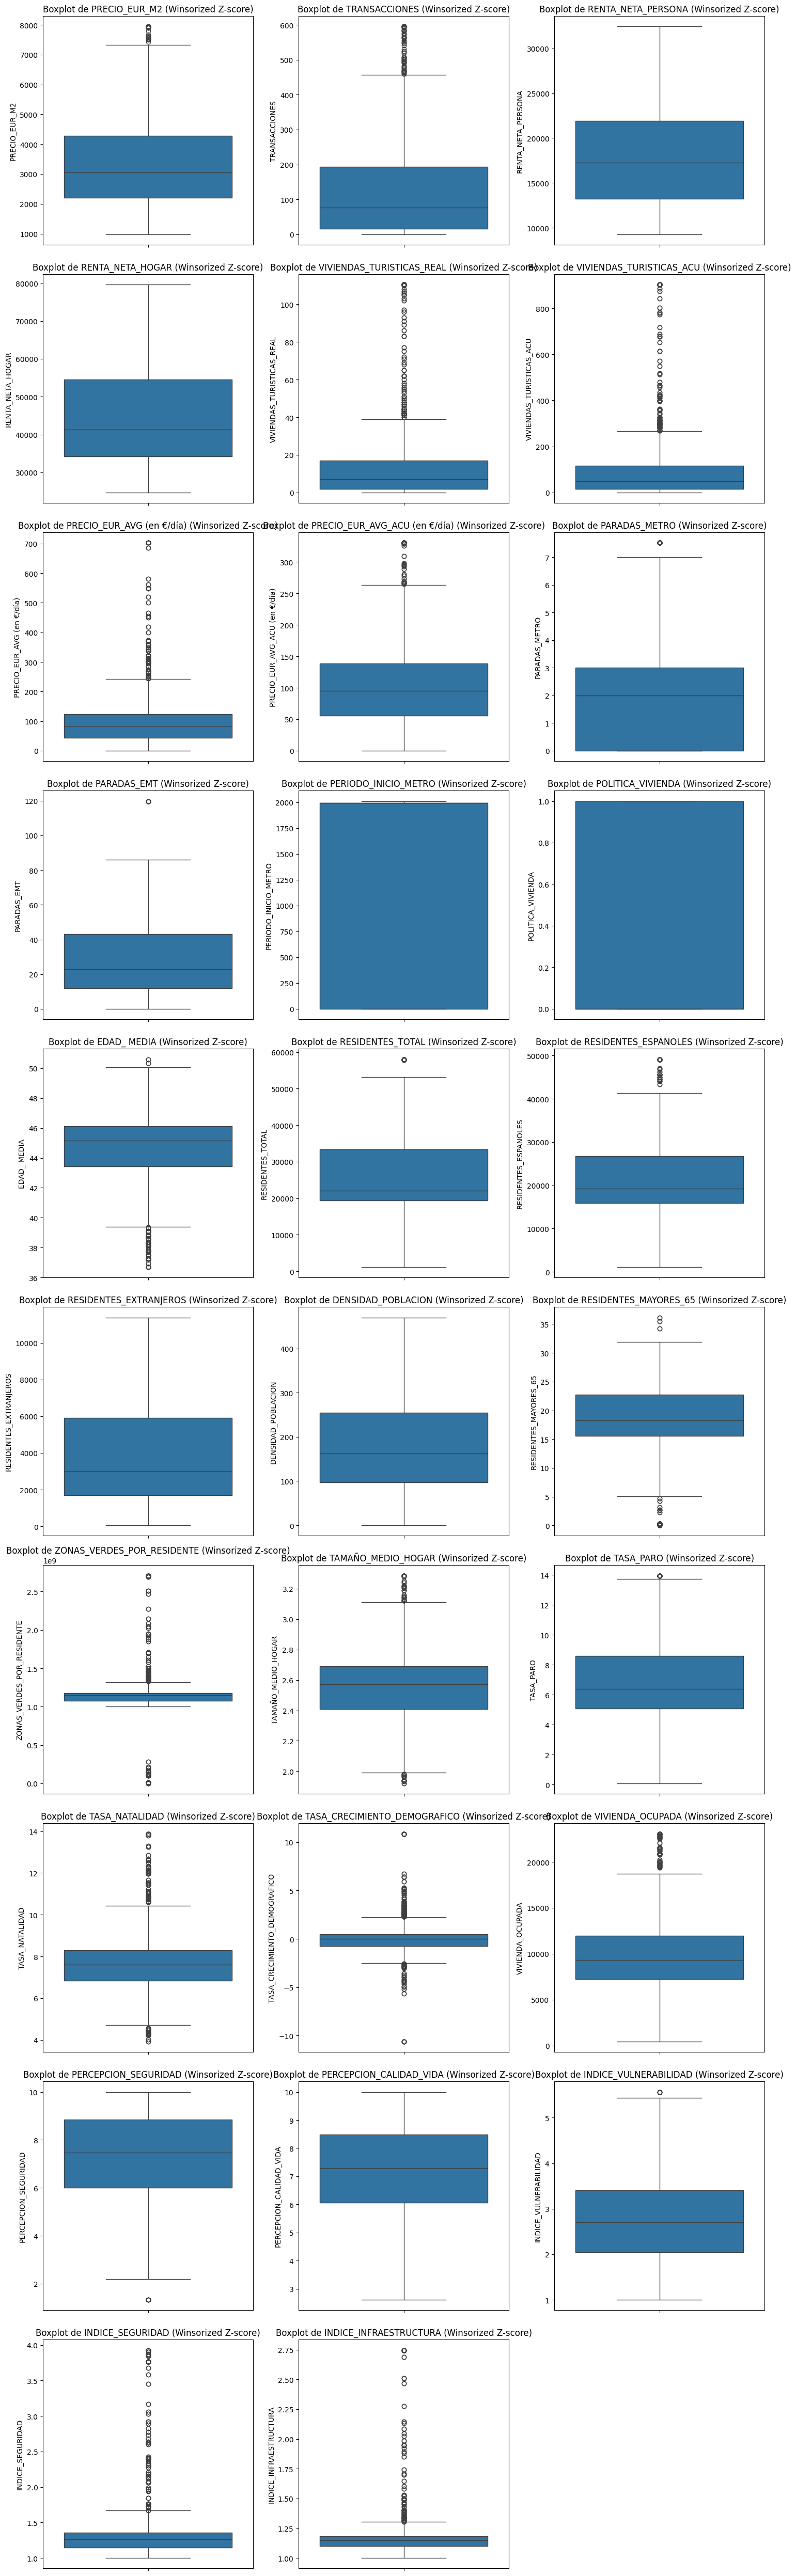

In [ ]:
# Visualizar los boxplots de los datos winsorizados para verificar
print("\nBoxplots de datos después de winsorización (Z-score):")
fig, axes = plt.subplots(nrows=(len(numeric_columns) // 3) + 1, ncols=3, figsize=(15, 5 * ((len(numeric_columns) // 3) + 1)))
axes = axes.flatten()
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=data_winsorized_zscore[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col} (Winsorized Z-score)')
    axes[i].set_ylabel(col)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

#### Interpretación de los Boxplots después de la Winsorización (Z-score)

Después de aplicar la winsorización basada en Z-score con un umbral de 3, los boxplots de las variables numéricas muestran lo siguiente:

*   **Reducción de Outliers:** En la mayoría de las variables que antes mostraban numerosos puntos individuales (outliers) lejos de los bigotes, estos puntos han desaparecido o se han acercado a los bigotes. Esto indica que los valores extremos que estaban a más de 3 desviaciones estándar de la media han sido reemplazados por los valores límite definidos por el umbral.

*   **Modificación de la Distribución en los Extremos:** La forma de la distribución en los extremos de cada variable se ha "aplanado" debido a que los valores más extremos ahora están agrupados en los umbrales superior e inferior. La caja central (IQR) y la mediana generalmente se mantienen similares a las de los boxplots originales, a menos que la variable tuviera una cantidad masiva de outliers que afectaran significativamente estas medidas.

*   **Variables Menos Afectadas:** Variables que tenían pocos o ningún outlier significativo según el método IQR (como `RENTA_NETA_PERSONA`, `RENTA_NETA_HOGAR`, `TASA_PARO`, `INDICE_VULNERABILIDAD`, etc.) muestran boxplots muy similares a los originales, ya que la winsorización no tuvo muchos valores que modificar en esas distribuciones.

*   **Variables Más Afectadas:** Variables con muchos outliers, como `ZONAS_VERDES_POR_RESIDENTE`, `RESIDENTES_MAYORES_65`, `TASA_CRECIMIENTO_DEMOGRAFICO`, y algunos de los índices, muestran un cambio más notable en los boxplots, con los bigotes terminando en los nuevos umbrales.

**En resumen:**

La winsorización ha cumplido su objetivo de reducir la influencia de los valores extremos en el dataset al limitar su rango.

Esto puede ser beneficioso para modelos que son sensibles a los outliers, como la regresión lineal, ya que ayuda a que el modelo no se vea desproporcionadamente afectado por unos pocos puntos de datos atípicos.

Sin embargo, es importante recordar que la winsorización altera los datos originales y puede ocultar información potencialmente importante sobre los valores extremos si no se maneja con cuidado.

### **3.2 Tratamiento de Zeros**

In [ ]:
VAR_CRIT = ["PRECIO_EUR_M2","RENTA_NETA_PERSONA","RENTA_NETA_HOGAR"]
GROUP_KEYS = ["DISTRITO","BARRIO","TIPO_VIVIENDA"]  # ajusta si usas otras

def to_numeric_safe(s):
    return pd.to_numeric(s.astype(str).str.replace(",", ".", regex=False), errors="coerce")

# Actualizar la función para usar VAR_CRIT en lugar de CRIT
def impute_crit_zeros_single(df, crit=VAR_CRIT, keys=GROUP_KEYS):
    X = df.copy()

    # Conversión segura a numérico
    for c in crit:
        if c in X.columns:
            X[c] = to_numeric_safe(X[c])

    # Flags + 0 -> NaN
    for c in crit:
        if c in X.columns:
            X[f"{c}__was_zero"] = (X[c] == 0).astype("Int8")
            X[c] = X[c].mask(X[c] == 0, np.nan)

    # Imputación por mediana agrupada y fallback global
    gkeys = [k for k in keys if k in X.columns]
    crit_present = [c for c in crit if c in X.columns]

    if gkeys and crit_present:
        med_grp = X.groupby(gkeys, dropna=False)[crit_present].transform("median")
        X[crit_present] = X[crit_present].fillna(med_grp)

    for c in crit_present:
        if X[c].isna().any():
            X[c] = X[c].fillna(X[c].median())

    return X

#### **Interpretación del tratamiento de ceros en variables críticas**

La función `impute_crit_zeros_single` se define para manejar los valores cero en variables numéricas específicas que se consideran críticas (`PRECIO_EUR_M2`, `RENTA_NETA_PERSONA`, `RENTA_NETA_HOGAR`).

Estos ceros son reemplazados por valores `NaN`, se crea una columna indicadora (`__was_zero`) para no perder el registro de dónde estaban los ceros originales, y finalmente los `NaN` son imputados utilizando la mediana agrupada por `DISTRITO`, `BARRIO` y `TIPO_VIVIENDA`, con la mediana global como fallback si es necesario.

Esto prepara estas variables para el modelado al abordar los ceros que podrían ser atípicos o representar datos faltantes.

<a id="section-four"></a>
## **4. Feature Engineering**

In [ ]:
# Identificar las columnas categóricas y numéricas del DataFrame 'data'
categorical = list(data.select_dtypes(include=['object', 'category']).columns)
numerical = list(data.select_dtypes(include=[np.number]).columns)

print("Columnas Categóricas:", categorical)
print("Columnas Numéricas:", numerical)

Columnas Categóricas: ['DISTRITO', 'BARRIO', 'TIPO_VIVIENDA']
Columnas Numéricas: ['PERIODO', 'PRECIO_EUR_M2', 'TRANSACCIONES', 'RENTA_NETA_PERSONA', 'RENTA_NETA_HOGAR', 'VIVIENDAS_TURISTICAS_REAL', 'VIVIENDAS_TURISTICAS_ACU', 'PRECIO_EUR_AVG (en €/día)', 'PRECIO_EUR_AVG_ACU (en €/día)', 'PARADAS_METRO', 'PARADAS_EMT', 'PERIODO_INICIO_METRO', 'POLITICA_VIVIENDA', 'EDAD_ MEDIA', 'RESIDENTES_TOTAL', 'RESIDENTES_ESPANOLES', 'RESIDENTES_EXTRANJEROS', 'DENSIDAD_POBLACION', 'RESIDENTES_MAYORES_65', 'ZONAS_VERDES_POR_RESIDENTE', 'TAMAÑO_MEDIO_HOGAR', 'TASA_PARO', 'TASA_NATALIDAD', 'TASA_CRECIMIENTO_DEMOGRAFICO', 'VIVIENDA_OCUPADA', 'PERCEPCION_SEGURIDAD', 'PERCEPCION_CALIDAD_VIDA', 'INDICE_VULNERABILIDAD', 'INDICE_SEGURIDAD', 'INDICE_INFRAESTRUCTURA']


<a id="section-four-subsection-one"></a>
### **4.1 Utilidades**

In [ ]:
TARGET_CANDIDATES = ["PRECIO_EUR_M2"]

def detect_target(df, candidates=TARGET_CANDIDATES):
    for c in candidates:
        if c in df.columns:
            return c
    raise KeyError(f"No se encontró ninguna columna objetivo entre {candidates}.")

def clean_numeric_series(s: pd.Series) -> pd.Series:
    """Limpieza robusta: quita separadores de miles y normaliza la coma decimal."""
    s = s.astype(str).str.strip()
    s = s.str.replace(r"\s+", "", regex=True)               # quita espacios
    s = np.where(s.str.contains(","), s.str.replace(".", "", regex=False), s)  # quita miles si hay coma decimal
    s = pd.Series(s).str.replace(",", ".", regex=False)
    return pd.to_numeric(s, errors="coerce")

def safe_divide(num, den, eps=1e-9):
    den = np.where(pd.to_numeric(den, errors="coerce") == 0, eps, den)
    return pd.to_numeric(num, errors="coerce") / den

def mi_feature(series: pd.Series, y_log: pd.Series, discrete: bool, random_state=42):
    """Mutual information por feature (manejo de NaN fila-a-fila)."""
    s = series.copy()
    if discrete:
        # Factoriza categóricas (NaN -> -1) sin expandir dimensión
        s = s.astype("category")
        codes = s.cat.codes.replace(-1, np.nan)  # -1 eran NaN
        X = codes.to_numpy().reshape(-1, 1)
        mask = ~np.isnan(X[:, 0]) & y_log.notna().to_numpy()
        if mask.sum() == 0:
            return np.nan
        return mutual_info_regression(X[mask], y_log.to_numpy()[mask],
                                      discrete_features=True,
                                      random_state=random_state)[0]
    else:
        x = pd.to_numeric(s, errors="coerce")
        mask = x.notna() & y_log.notna()
        if mask.sum() == 0:
            return np.nan
        X = x[mask].to_numpy().reshape(-1, 1)
        y = y_log[mask].to_numpy()
        return mutual_info_regression(X, y, discrete_features=False, random_state=42)[0]

<a id="section-four-subsection-one"></a>
### **4.2 Detección y preparación de columnas**

In [ ]:
target = detect_target(data)
if not np.issubdtype(data[target].dtype, np.number):
    data[target] = clean_numeric_series(data[target])

y_log = np.log1p(pd.to_numeric(data[target], errors="coerce"))

categorical = list(data.select_dtypes(include=['object', 'category']).columns)
numerical   = list(data.select_dtypes(include=[np.number]).columns)
# Evitamos incluir el target en los análisis de X
numerical   = [c for c in numerical if c != target]

print("Columnas Categóricas:", categorical)
print("Columnas Numéricas (sin target):", numerical)


Columnas Categóricas: ['DISTRITO', 'BARRIO', 'TIPO_VIVIENDA']
Columnas Numéricas (sin target): ['PERIODO', 'TRANSACCIONES', 'RENTA_NETA_PERSONA', 'RENTA_NETA_HOGAR', 'VIVIENDAS_TURISTICAS_REAL', 'VIVIENDAS_TURISTICAS_ACU', 'PRECIO_EUR_AVG (en €/día)', 'PRECIO_EUR_AVG_ACU (en €/día)', 'PARADAS_METRO', 'PARADAS_EMT', 'PERIODO_INICIO_METRO', 'POLITICA_VIVIENDA', 'EDAD_ MEDIA', 'RESIDENTES_TOTAL', 'RESIDENTES_ESPANOLES', 'RESIDENTES_EXTRANJEROS', 'DENSIDAD_POBLACION', 'RESIDENTES_MAYORES_65', 'ZONAS_VERDES_POR_RESIDENTE', 'TAMAÑO_MEDIO_HOGAR', 'TASA_PARO', 'TASA_NATALIDAD', 'TASA_CRECIMIENTO_DEMOGRAFICO', 'VIVIENDA_OCUPADA', 'PERCEPCION_SEGURIDAD', 'PERCEPCION_CALIDAD_VIDA', 'INDICE_VULNERABILIDAD', 'INDICE_SEGURIDAD', 'INDICE_INFRAESTRUCTURA']


In [ ]:
# Vistas de precio por distrito/barrio

if "DISTRITO" in data.columns:
    print("\nPrecio medio por m² por DISTRITO:")
    display(
        data.groupby("DISTRITO", dropna=False)[target]
            .mean()
            .sort_values(ascending=False)
            .to_frame(name=f"{target}_mean")
            .head(25)
    )

if "BARRIO" in data.columns:
    print("\nTop 10 BARRIOS por precio medio m²:")
    display(
        data.groupby("BARRIO", dropna=False)[target]
            .mean()
            .sort_values(ascending=False)
            .to_frame(name=f"{target}_mean")
            .head(10)
    )


Precio medio por m² por DISTRITO:


PRECIO_EUR_M2_mean
DISTRITO                                   
04. Salamanca                   6097.629167
07. Chamberí                    5407.432500
01. Centro                      4990.153333
05. Chamartín                   4901.527500
03. Retiro                      4704.863333
09. Moncloa-Aravaca             3905.582857
02. Arganzuela                  3873.976429
08. Fuencarral-El Pardo         3652.729375
16. Hortaleza                   3502.567500
15. Ciudad Lineal               3496.773889
06. Tetuán                      3441.972500
21. Barajas                     3240.198000
20. San Blas-Canillejas         2445.698125
14. Moratalaz                   2397.941667
19. Vicálvaro                   2305.725000
10. Latina                      2249.507857
11. Carabanchel                 2219.084286
18. Villa de Vallecas           2160.421667
12. Usera                       1917.231429
13. Puente de Vallecas          1772.345000
17. Villaverde                  1685.788000


Top 10 BARRIOS por precio medio m²:


PRECIO_EUR_M2_mean
BARRIO                                   
041. Recoletos                  7212.5500
046. Castellana                 6674.2375
045. Lista                      5973.6600
042. Goya                       5956.8150
074. Almagro                    5952.4275
051. El Viso                    5535.2150
075. Ríos Rosas                 5517.0425
035. Los Jerónimos              5469.9525
043. Fuente del Berro           5455.9700
055. Nueva España               5377.4525

###**4.3 Creación de features**

In [ ]:
# Combinaciones de infraestructuras
df_fe = data.copy()

if {"PARADAS_METRO","PARADAS_EMT"}.issubset(df_fe.columns):
    df_fe["PARADAS_TOTAL"] = pd.to_numeric(df_fe["PARADAS_METRO"], errors="coerce").fillna(0) + \
                             pd.to_numeric(df_fe["PARADAS_EMT"], errors="coerce").fillna(0)
    df_fe["TIENE_METRO"] = (pd.to_numeric(df_fe["PARADAS_METRO"], errors="coerce").fillna(0) > 0).astype(np.int8)
    df_fe["TIENE_EMT"]  = (pd.to_numeric(df_fe["PARADAS_EMT"], errors="coerce").fillna(0) > 0).astype(np.int8)


In [ ]:
# Ratios y densidades
if {"PRECIO_EUR_DIA_AVG_ACU","RENTA_HOGAR"}.issubset(df_fe.columns):
    df_fe["PRECIO_TURISMO_REL"] = safe_divide(df_fe["PRECIO_EUR_DIA_AVG_ACU"], df_fe["RENTA_HOGAR"])

if {"PARADAS_TOTAL","SUPERFICIE_M2"}.issubset(df_fe.columns):
    df_fe["DENSIDAD_PARADAS"] = safe_divide(df_fe["PARADAS_TOTAL"], df_fe["SUPERFICIE_M2"])

if {"RENTA_HOGAR","RENTA_PERSONA"}.issubset(df_fe.columns):
    df_fe["RENTA_X_PERSONA_HOGAR"] = safe_divide(df_fe["RENTA_HOGAR"], df_fe["RENTA_PERSONA"])

In [ ]:
# Interacciones
if {"RENTA_HOGAR","INDICE_INFRAESTRUCTURA"}.issubset(df_fe.columns):
    df_fe["RENTAxINFRA"] = pd.to_numeric(df_fe["RENTA_HOGAR"], errors="coerce") * \
                           pd.to_numeric(df_fe["INDICE_INFRAESTRUCTURA"], errors="coerce")

if {"PRECIO_EUR_DIA_AVG_ACU","TIENE_METRO"}.issubset(df_fe.columns):
    df_fe["PRECIO_TURISMOxMETRO"] = pd.to_numeric(df_fe["PRECIO_EUR_DIA_AVG_ACU"], errors="coerce") * \
                                    pd.to_numeric(df_fe["TIENE_METRO"], errors="coerce")

In [ ]:
# Reporte de nuevas columnas y salida final

new_cols = sorted(list(set(df_fe.columns) - set(data.columns)))
print("\n Nuevas features creadas:", new_cols)

data_features = df_fe.copy()


 Nuevas features creadas: ['PARADAS_TOTAL', 'TIENE_EMT', 'TIENE_METRO']


###**4.4 EDA Post-Feature Engineering**

In [ ]:
# Seleccionamos solo variables numéricas
num_cols = data_features.select_dtypes(include=[np.number]).columns.tolist()

# Matriz de correlación
corr_matrix = data_features[num_cols].corr(method="pearson")

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=False)
plt.title("Matriz de Correlación - Variables Numéricas (post-FE)", fontsize=14)
plt.show()

#  Detección de alta correlación
# Guardamos pares de variables con |correlación| > 0.9
high_corr_pairs = []
threshold = 0.9

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            high_corr_pairs.append((col1, col2, corr_matrix.iloc[i,j]))

high_corr_pairs = pd.DataFrame(high_corr_pairs, columns=["Var1","Var2","Correlation"])
print(">> Variables altamente correlacionadas (>|0.9|):")
display(high_corr_pairs)

# Eliminación de variables redundantes
# Estrategia: nos quedamos con la primera aparición y eliminamos duplicadas
to_drop = set()
for col1, col2, corr in high_corr_pairs.itertuples(index=False):
    if col2 not in to_drop:
        to_drop.add(col2)

print(f">> Eliminaremos {len(to_drop)} variables por alta correlación.")
print("Variables a eliminar:", to_drop)

# Creamos dataset reducido
data_reduced = data_features.drop(columns=list(to_drop), errors="ignore")

print(f"Shape original: {data_features.shape} | Shape reducido: {data_reduced.shape}")


>> Variables altamente correlacionadas (>|0.9|):


Var1                  Var2  Correlation
0         RENTA_NETA_HOGAR    RENTA_NETA_PERSONA     0.970683
1         VIVIENDA_OCUPADA  RESIDENTES_ESPANOLES     0.956728
2  PERCEPCION_CALIDAD_VIDA  PERCEPCION_SEGURIDAD     0.938647
3            PARADAS_TOTAL           PARADAS_EMT     0.998162
4              TIENE_METRO  PERIODO_INICIO_METRO     0.999988

>> Eliminaremos 5 variables por alta correlación.
Variables a eliminar: {'PERCEPCION_SEGURIDAD', 'PARADAS_EMT', 'PERIODO_INICIO_METRO', 'RENTA_NETA_PERSONA', 'RESIDENTES_ESPANOLES'}
Shape original: (2620, 36) | Shape reducido: (2620, 31)


In [ ]:
display(data_reduced.head())

DISTRITO            BARRIO  PERIODO TIPO_VIVIENDA  PRECIO_EUR_M2  \
0  01. Centro      011. Palacio     2015         NUEVA         3017.4   
1  01. Centro  012. Embajadores     2015         NUEVA         3017.4   
2  01. Centro       013. Cortes     2015         NUEVA         3017.4   
3  01. Centro     014. Justicia     2015         NUEVA         3017.4   
4  01. Centro  015. Universidad     2015         NUEVA         3017.4   

   TRANSACCIONES  RENTA_NETA_HOGAR  VIVIENDAS_TURISTICAS_REAL  \
0             24             31392                        166   
1             24             31392                        301   
2             24             31392                         89   
3             24             31392                        136   
4             24             31392                        229   

   VIVIENDAS_TURISTICAS_ACU  PRECIO_EUR_AVG (en €/día)  ...  TASA_NATALIDAD  \
0                       479                        273  ...           5.975   
1                       885                        231  ...           5.975   
2                       300                        184  ...           5.975   
3                       327                        143  ...           5.975   
4                       676                        168  ...           5.975   

   TASA_CRECIMIENTO_DEMOGRAFICO  VIVIENDA_OCUPADA  PERCEPCION_CALIDAD_VIDA  \
0                          0.46           10218.5                 7.012072   
1                          0.46           10218.5                 7.012072   
2                          0.46           10218.5                 7.012072   
3                          0.46           10218.5                 7.012072   
4                          0.46           10218.5                 7.012072   

   INDICE_VULNERABILIDAD  INDICE_SEGURIDAD  INDICE_INFRAESTRUCTURA  \
0               3.511991          3.768293                 1.04453   
1               3.511991          3.768293                 1.04453   
2               3.511991          3.768293                 1.04453   
3               3.511991          3.768293                 1.04453   
4               3.511991          3.768293                 1.04453   

   PARADAS_TOTAL  TIENE_METRO  TIENE_EMT  
0           39.0            1          1  
1           84.0            1          1  
2           34.0            1          1  
3           62.0            1          1  
4           30.0            1          1  

[5 rows x 31 columns]

## **5. Modelado**



<a id="section-four-subsection-one"></a>
### **AutoML como primera aproximación**

In [ ]:
!pip install -q h2o
import h2o
from h2o.automl import H2OAutoML

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 3.2 MB/s eta 0:00:00


In [ ]:
h2o.init()
hf = h2o.H2OFrame(data_reduced)
aml = H2OAutoML(max_runtime_secs=900, seed=42, sort_metric="RMSE")
aml.train(y="PRECIO_EUR_M2", training_frame=hf)
aml.leader, aml.leaderboard.head()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.28" 2025-07-15; OpenJDK Runtime Environment (build 11.0.28+6-post-Ubuntu-1ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.28+6-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.12/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmprhav3x0c
  JVM stdout: /tmp/tmprhav3x0c/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmprhav3x0c/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.7
H2O_cluster_version_age:    5 months and 21 days
H2O_cluster_name:           H2O_from_python_unknownUser_xnuft7
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    12.75 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.12.11 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


(Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_5_AutoML_1_20250918_81030


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       185/188
# GBM base models (used / total)           51/52
# XGBoost base models (used / total)       115/117
# DeepLearning base models (used / total)  16/16
# DRF base models (used / total)           2/2
# GLM base models (used / total)           1/1
Metalearner algorithm                      GBM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegression: stackedensemble
** Reported on train data. **

MSE: 83231.93586210415
RMSE: 288.49945556639125
MAE: 153.22090185372969
RMSLE: 0.063604

#### **Interpretación de los resultados del modelo de Regresión Lineal** (conjunto de validación)

Después de entrenar el modelo de Regresión Lineal y evaluarlo en el conjunto de validación (`df_val`), obtuvimos los siguientes resultados:

*   **Mean Squared Error (MSE): 0.07512268217448183**
    *   El MSE es el promedio de los errores al cuadrado entre los valores predichos y los valores reales. Un MSE más bajo indica que el modelo tiene un mejor rendimiento.
    * Un valor de 0.075 es relativamente bajo, lo que sugiere que las predicciones del modelo están, en promedio, bastante cerca de los valores reales (en la escala logarítmica).

*   **Root Mean Squared Error (RMSE): 0.27408517321168946**
    *   El RMSE es la raíz cuadrada del MSE. Se mide en las mismas unidades que la variable objetivo (en este caso, el logaritmo de `PRECIO_EUR_M2`). Un RMSE de aproximadamente 0.274 significa que la diferencia típica entre las predicciones del modelo y los valores reales (en la escala logarítmica) es alrededor de 0.274
    
    * Este valor proporciona una medida más interpretable del error del modelo en la escala original de la variable objetivo transformada logarítmicamente.

**Consideraciones:**

*   Estos errores se basan en la variable objetivo **transformada logarítmicamente** (`y_val`, que es `log1p(PRECIO_EUR_M2)`). Para interpretar el error en la escala original de `PRECIO_EUR_M2`, necesitarías aplicar la transformación inversa (`expm1`).

*   El rendimiento de 0.274 en RMSE en la escala logarítmica parece prometedor, pero la interpretación exacta de qué tan "bueno" es este valor depende del contexto del problema y de la variabilidad de la variable objetivo.

En resumen, los valores de MSE y RMSE indican que el modelo de Regresión Lineal, después del preprocesamiento y entrenado en los datos transformados logarítmicamente, tiene un rendimiento razonable en la predicción del precio por metro cuadrado en el conjunto de validación.

<a id="section-four-subsection-one"></a>
### **Preparación del Pipeline de Preprocesamiento y División de Datos**

In [ ]:
# Definir variables predictoras (X) y target (y)
target = "PRECIO_EUR_M2"
X = data_reduced.drop(columns=[target])
y = data_reduced[target]

# Identificar tipos de variables
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print("Variables categóricas:", cat_cols)
print("Variables numéricas:", num_cols)

#  Definir transformadores
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),   # imputación robusta
    ("scaler", StandardScaler())                     # escalado estándar
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), # imputación de moda
    ("encoder", OneHotEncoder(handle_unknown="ignore"))   # codificación dummy
])

# ColumnTransformer que aplica cada pipeline a su tipo de variable
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ],
    remainder="drop"
)

# División en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=None  # si quisieras balancear por categorías, aquí se activa
)

print(f"Tamaño Train: {X_train.shape}, Test: {X_test.shape}")

Variables categóricas: ['DISTRITO', 'BARRIO', 'TIPO_VIVIENDA']
Variables numéricas: ['PERIODO', 'TRANSACCIONES', 'RENTA_NETA_HOGAR', 'VIVIENDAS_TURISTICAS_REAL', 'VIVIENDAS_TURISTICAS_ACU', 'PRECIO_EUR_AVG (en €/día)', 'PRECIO_EUR_AVG_ACU (en €/día)', 'PARADAS_METRO', 'POLITICA_VIVIENDA', 'EDAD_ MEDIA', 'RESIDENTES_TOTAL', 'RESIDENTES_EXTRANJEROS', 'DENSIDAD_POBLACION', 'RESIDENTES_MAYORES_65', 'ZONAS_VERDES_POR_RESIDENTE', 'TAMAÑO_MEDIO_HOGAR', 'TASA_PARO', 'TASA_NATALIDAD', 'TASA_CRECIMIENTO_DEMOGRAFICO', 'VIVIENDA_OCUPADA', 'PERCEPCION_CALIDAD_VIDA', 'INDICE_VULNERABILIDAD', 'INDICE_SEGURIDAD', 'INDICE_INFRAESTRUCTURA', 'PARADAS_TOTAL', 'TIENE_METRO', 'TIENE_EMT']
Tamaño Train: (2096, 30), Test: (524, 30)


###**5.1 Regresión Lineal**

El primer modelo que utilizamos es uno de regresión lineal. En este modelo, se espera que el valor objetivo sea una combinación lineal de las características. Los coeficientes se fijan para minimizar la suma residual de cuadrados entre el objetivo previsto y las características observadas.

**Parámetros utilizados**:

- **fit_intercept**: un valor booleano que indica si se debe incluir o no el intercepto (constante) en el modelo. El valor por defecto es True.

- **normalize**: un valor booleano que indica si se deben normalizar o no las variables explicativas antes de ajustar el modelo. Si se establece en True, todas las variables explicativas se escalan para tener media cero y varianza unitaria antes de ajustar el modelo. El valor por defecto es False.


**Pros**:
- Fácil de entender e interpretar.
- Rápido de implementar y computacionalmente eficiente.
- Puede ser utilizado como punto de partida para modelos más complejos.

**Contras**:
- Asunción de linealidad entre las variables independientes y dependientes.
- Sensible a los valores atípicos y la presencia de puntos influyentes.
- No es adecuado para relaciones no lineales entre variables.

🔗 Más info: en el siguiente [enlace](https://ebac.mx/blog/regreson-lineal)

In [ ]:
  from sklearn.linear_model import LinearRegression

  model = Pipeline(steps=[
      ("preprocessor", preprocessor),
      ("regressor", LinearRegression())
  ])

  # Entrenar y probar
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  from sklearn.metrics import mean_squared_error, r2_score
  import numpy as np

  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse) # Calculate RMSE manually

  r2 = r2_score(y_test, y_pred)

  print(f"RMSE en test: {rmse:.2f}")
  print(f"R² en test: {r2:.3f}")

RMSE en test: 551.97
R² en test: 0.878


#### **Interpretación de los resultados del modelo de Regresión Lineal** (conjunto de test)

Después de entrenar el modelo de Regresión Lineal y evaluarlo en el conjunto de test, obtuvimos los siguientes resultados:

*   **RMSE en test: 551.97**
    *   El RMSE (Root Mean Squared Error) en el conjunto de test es de aproximadamente 551.97.
    * Esto significa que, en promedio, las predicciones del modelo de Regresión Lineal se desvían de los precios reales de las viviendas en el conjunto de test en aproximadamente 552 euros por metro cuadrado.

*   **R² en test: 0.878**
    *   El R² (Coeficiente de Determinación) en el conjunto de test es de aproximadamente 0.878.
    * Esto indica que el modelo de Regresión Lineal explica alrededor del 87.8% de la variabilidad en el precio por metro cuadrado de las viviendas en el conjunto de test. Un valor de R² cercano a 1 sugiere que el modelo tiene una buena capacidad para predecir la variable objetivo.

En resumen, el modelo de Regresión Lineal parece tener un rendimiento razonable en la predicción del precio por metro cuadrado, con un error promedio de alrededor de 552 €/m² y explicando una gran parte de la variabilidad en los precios en el conjunto de test.

###**5.2 Regresión Ridge**

Variante de la regresión lineal que añade regularización L2, penalizando los coeficientes grandes para reducir la varianza.

**Parámetros principales**:
- alpha (intensidad de regularización).  
- solver (método de optimización).  

**Pros**:
- Reduce multicolinealidad.  
- Mejora generalización frente a OLS.  
- Mantiene todas las variables (no elimina).  

**Contras**:
- Interpretación menos directa por la penalización.  
- Sensible a la escala de variables si no están normalizadas.  

🔗 Más info: [Ridge Regression (Scikit-learn)](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split # Added GridSearchCV and train_test_split
from sklearn.linear_model import Ridge # Added Ridge
from sklearn.metrics import mean_absolute_error # Added mean_absolute_error
from sklearn.pipeline import Pipeline # Added Pipeline


#  Model Ridge + Pipeline
# -----------------------------
ridge = Ridge(random_state=None)

pipe = Pipeline(steps=[
    ("pre", preprocessor),
    ("model", ridge),
])

# -----------------------------
# Tuning de hiperparámetros
# -----------------------------
param_grid = {
    "model__alpha": np.logspace(-3, 3, 13)  # 0.001 ... 1000
}
gcv = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",  # optimizamos RMSE
    cv=5,
    n_jobs=-1,
    verbose=0
)

# Split X_train and y_train into training and validation sets
X_train_split, X_valid, y_train_split, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


gcv.fit(X_train_split, y_train_split)

best_model = gcv.best_estimator_
print(f"Mejor alpha: {gcv.best_params_['model__alpha']}")

# -----------------------------
#  Evaluación
# -----------------------------
def evaluate(model, X_, y_, name):
    pred = model.predict(X_)
    mse = mean_squared_error(y_, pred)
    rmse = np.sqrt(mse) # Calculate RMSE manually
    mae  = mean_absolute_error(y_, pred)
    r2   = r2_score(y_, pred)
    print(f"[{name}] RMSE: {rmse:,.2f} | MAE: {mae:,.2f} | R²: {r2:.3f}")
    return pred, {"rmse": rmse, "mae": mae, "r2": r2}

_ , _ = evaluate(best_model, X_valid, y_valid, name="VALID")
yhat_test, _ = evaluate(best_model, X_test,  y_test,  name="TEST")

# Importancia de variables (coeficientes de Ridge)
# -----------------------------
try:
    # Nombres de features después del preprocesado
    feat_names = best_model.named_steps["pre"].get_feature_names_out()
    coefs = best_model.named_steps["model"].coef_.ravel()

    coef_series = pd.Series(coefs, index=feat_names).sort_values(
        key=lambda s: s.abs(), ascending=False
    )

    print("\nTop 25 variables por importancia (|coef|):")
    display(coef_series.head(25).to_frame("coef"))

    # Gráfico de barras
    import matplotlib.pyplot as plt
    plt.figure(figsize=(7,5))
    coef_series.head(25).sort_values().plot(kind="barh")
    plt.title("Ridge — Top 25 variables más influyentes")
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("No se pudieron extraer coeficientes:", e)

Mejor alpha: 1.0
[VALID] RMSE: 533.98 | MAE: 365.12 | R²: 0.885
[TEST] RMSE: 559.57 | MAE: 361.45 | R²: 0.875

Top 25 variables por importancia (|coef|):


coef
cat__DISTRITO_09. Moncloa-Aravaca     -1251.610785
cat__BARRIO_041. Recoletos             1223.014567
num__RENTA_NETA_HOGAR                  1197.188491
cat__DISTRITO_05. Chamartín            -876.368941
cat__DISTRITO_01. Centro                830.465899
cat__BARRIO_012. Embajadores           -762.504644
cat__DISTRITO_04. Salamanca             749.036821
cat__BARRIO_014. Justicia               733.257596
cat__DISTRITO_21. Barajas              -702.115121
cat__BARRIO_152. Pueblo Nuevo          -697.258466
cat__DISTRITO_16. Hortaleza            -670.790409
cat__BARRIO_088. El Goloso              644.951973
cat__BARRIO_074. Almagro                608.018125
cat__DISTRITO_07. Chamberí              596.578915
cat__BARRIO_094. Valdezarza            -590.092240
cat__BARRIO_035. Los Jerónimos          576.026124
cat__BARRIO_046. Castellana             561.378766
cat__DISTRITO_08. Fuencarral-El Pardo  -550.336179
cat__BARRIO_159. Costillares            542.095928
cat__BARRIO_052. Prosperidad           -508.139644
cat__BARRIO_024. Legazpi                491.926046
cat__BARRIO_164. Pinar del Rey         -486.994331
cat__DISTRITO_06. Tetuán                481.648967
cat__BARRIO_157. Colina                 468.931012
cat__BARRIO_016. Sol                    468.308881

#### **Interpretación de los resultados del modelo Ridge** (conjuntos de validación y test)

Después de entrenar el modelo Ridge con ajuste de hiperparámetros y evaluarlo en los conjuntos de validación y test, obtuvimos los siguientes resultados:

*   **VALID RMSE: 533.98 | MAE: 365.12 | R²: 0.885**
*   **TEST RMSE: 559.57 | MAE: 361.45 | R²: 0.875**

Estos resultados nos dan una idea clara del rendimiento del modelo Ridge en la predicción del `PRECIO_EUR_M2`:

*   **RMSE (Error Cuadrático Medio de la Raíz):**
- El RMSE en el conjunto de validación es de aproximadamente 533.98 €/m² y en el conjunto de test es de aproximadamente 559.57 €/m².
- Esto significa que, en promedio, las predicciones del modelo se desvían de los precios reales en alrededor de 534-560 euros por metro cuadrado.

*   **MAE (Error Absoluto Medio):**
- El MAE en validación es de aproximadamente 365.12 €/m² y en test es de aproximadamente 361.45 €/m².
- El MAE es menos sensible a los outliers que el RMSE. Estos valores sugieren que la diferencia absoluta promedio entre las predicciones y los valores reales es menor que el RMSE, lo cual es común y puede indicar que hay algunos errores más grandes que influyen en el RMSE.

*   **R² (Coeficiente de Determinación):**
- El R² en validación es de 0.885 y en test es de 0.875. Un R² cercano a 1 indica que el modelo explica una gran proporción de la variabilidad en la variable objetivo.
- En este caso, el modelo Ridge explica aproximadamente el 88.5% de la variabilidad en los precios de la vivienda en el conjunto de validación y el 87.5% en el conjunto de test. Estos son valores altos y sugieren que el modelo tiene una buena capacidad predictiva.

**En resumen:**

El modelo Ridge ajustado muestra un **buen rendimiento general**, con un error de predicción razonable (alrededor de 534-560 €/m²) y una alta capacidad para explicar la variabilidad en los precios de la vivienda (aproximadamente 87.5-88.5% de la varianza explicada).

La consistencia en las métricas entre los conjuntos de validación y test sugiere que el modelo **generaliza bien** a datos no vistos y no parece haber un sobreajuste significativo.

Comparando estos resultados con el modelo de Regresión Lineal simple que evaluamos anteriormente (RMSE en test: 551.97, R² en test: 0.878), el modelo Ridge muestra un rendimiento ligeramente mejor en el conjunto de validación y un rendimiento muy similar en el conjunto de test.

###**5.3 Modelo Random Forest**

Conjunto de múltiples árboles entrenados sobre subconjuntos aleatorios de datos y variables (bagging).

**Parámetros principales**:
- n_estimators (número de árboles).  
- max_features (subconjunto de variables por split).  
- bootstrap (muestras con reemplazo).  

**Pros**:
- Mejora precisión respecto a un árbol único.  
- Robusto frente a overfitting.  
- Proporciona medidas de importancia de variables.  

**Contras**:
- Menos interpretable que un único árbol.  
- Mayor coste computacional.  

🔗 Más info: [Random Forest (Scikit-learn)](https://scikit-learn.org/stable/modules/ensemble.html#random-forests)


Creado VALID interno (20% de TRAIN).
Dimensiones -> Train: (1676, 181), Valid: (420, 181), Test: (524, 181)
OOB R² (aprox.): 0.8610299957580101
[VALID] RMSE: 506.53 | MAE: 336.80 | R²: 0.896
[TEST] RMSE: 585.70 | MAE: 355.67 | R²: 0.863

Top 25 features por importancia:


importance
num__RENTA_NETA_HOGAR                 0.131119
num__TASA_PARO                        0.109301
num__VIVIENDAS_TURISTICAS_ACU         0.060280
num__PERCEPCION_CALIDAD_VIDA          0.059187
num__PRECIO_EUR_AVG_ACU (en €/día)    0.052853
num__TAMAÑO_MEDIO_HOGAR               0.052159
num__PERIODO                          0.050800
num__RESIDENTES_EXTRANJEROS           0.033457
num__EDAD_ MEDIA                      0.028124
num__INDICE_VULNERABILIDAD            0.027473
num__DENSIDAD_POBLACION               0.027055
num__PRECIO_EUR_AVG (en €/día)        0.025264
num__VIVIENDAS_TURISTICAS_REAL        0.025184
num__RESIDENTES_MAYORES_65            0.024059
num__POLITICA_VIVIENDA                0.020183
num__ZONAS_VERDES_POR_RESIDENTE       0.018384
num__TRANSACCIONES                    0.018047
num__INDICE_SEGURIDAD                 0.017726
num__PARADAS_METRO                    0.016567
cat__DISTRITO_04. Salamanca           0.016155
num__INDICE_INFRAESTRUCTURA           0.016155
num__TASA_NATALIDAD                   0.015283
num__RESIDENTES_TOTAL                 0.014944
num__VIVIENDA_OCUPADA                 0.014237
num__TASA_CRECIMIENTO_DEMOGRAFICO     0.012700

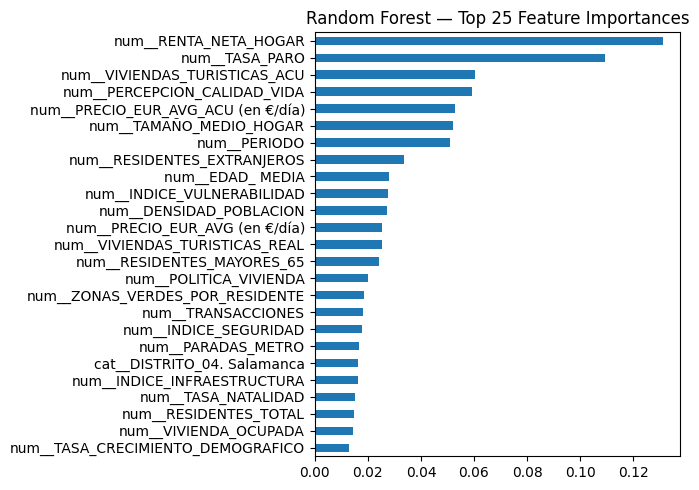

In [ ]:

import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -----------------------------
# Validación (usar Xe,ye si existen; si no, crear desde TRAIN)
# -----------------------------
try:
    _ = Xe, ye
    X_tr, y_tr = X_train, y_train
    X_val, y_val = Xe, ye
    print("Usando VALID externo (Xe, ye).")
except NameError:
    X_tr, X_val, y_tr, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )
    print("Creado VALID interno (20% de TRAIN).")

# -----------------------------
# Ajustar/transformar con tu preprocessor existente (sin fugas)
# -----------------------------
preprocessor.fit(X_tr)

def transform_all(pre, X_list):
    Xt = [pre.transform(Xi) for Xi in X_list]
    try:
        feat_names = pre.get_feature_names_out()
    except Exception:
        feat_names = [f"f{i}" for i in range(Xt[0].shape[1])]
    return Xt, feat_names

(X_tr_t, X_val_t, X_test_t), feat_names = transform_all(preprocessor, [X_tr, X_val, X_test])
print(f"Dimensiones -> Train: {X_tr_t.shape}, Valid: {X_val_t.shape}, Test: {X_test_t.shape}")

# -----------------------------
# Modelo Random Forest (baseline sólido)
#    Nota: OOB evalúa internamente sobre muestras fuera-de-bolsa
# -----------------------------
rf = RandomForestRegressor(
    n_estimators=1000,
    max_depth=None,          # crecer hasta puro; controla con min_samples_*
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",     # buen default para tabular
    bootstrap=True,
    oob_score=True,          # métrica OOB (no usa VALID)
    n_jobs=-1,
    random_state=42
)

rf.fit(X_tr_t, y_tr)
print(f"OOB R² (aprox.): {getattr(rf, 'oob_score_', None)}")


# Evaluación (VALID y TEST)

def evaluate(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse) # Calculate RMSE manually
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    print(f"[{name}] RMSE: {rmse:,.2f} | MAE: {mae:,.2f} | R²: {r2:.3f}")
    return rmse, mae, r2

yhat_val  = rf.predict(X_val_t)
_ = evaluate("VALID", y_val, yhat_val)

yhat_test = rf.predict(X_test_t)
_ = evaluate("TEST",  y_test, yhat_test)

# Importancias de variables (Gini)
# -----------------------------
importances = pd.Series(rf.feature_importances_, index=feat_names).sort_values(ascending=False)
print("\nTop 25 features por importancia:")
display(importances.head(25).to_frame("importance"))

plt.figure(figsize=(7,5))
importances.head(25).sort_values().plot(kind="barh")
plt.title("Random Forest — Top 25 Feature Importances")
plt.tight_layout()
plt.show()

#### **Interpretación de los resultados del modelo **Random Forest** (conjuntos de validación y test)**

Después de entrenar el modelo Random Forest y evaluarlo en los conjuntos de validación y test, obtuvimos:

- **VALID** → **RMSE:** 506.53 €/m² | **MAE:** 336.80 €/m² | **R²:** 0.896  
- **TEST**  → **RMSE:** 585.70 €/m² | **MAE:** 355.67 €/m² | **R²:** 0.863  
- **OOB R² (aprox.)**: 0.861

**RMSE (Raíz del Error Cuadrático Medio):**  
En validación es ~**506.53 €/m²** y en test ~**585.70 €/m²**. Esto indica que, en promedio, las predicciones se desvían de los valores reales en el orden de **507–586 €/m²**. El incremento de VALID → TEST sugiere un **ligero deterioro fuera de muestra** (posible sobreajuste moderado y/o cambio de distribución entre particiones).

**MAE (Error Absoluto Medio):**  
En validación es ~**336.80 €/m²** y en test ~**355.67 €/m²**. Como el MAE penaliza menos los errores grandes que el RMSE, que **MAE < RMSE** es esperable y sugiere **algunos casos con errores altos** (outliers o segmentos difíciles) que elevan el RMSE.

**R² (Coeficiente de Determinación):**  
Obtenemos **0.896** en validación y **0.863** en test. El modelo explica aproximadamente el **89.6%** de la variabilidad del precio en validación y el **86.3%** en test, reflejando **buena capacidad predictiva** en datos no vistos. El **OOB R² ≈ 0.861** es coherente con el R² de test, lo que refuerza que el modelo **generaliza razonablemente bien**.


**En resumen**
- El Random Forest muestra **buen rendimiento general**: explica entre **86–90%** de la varianza y mantiene errores absolutos en el rango de **~337–356 €/m²** y RMSE de **~507–586 €/m²**.  
- La brecha VALID → TEST es **moderada**; conviene:
  - Analizar errores por **barrio**, **periodo (año/mes)** y **deciles de precio** para localizar segmentos difíciles.
  - Ajustar **regularización** del bosque (p. ej., `min_samples_leaf`, `max_depth`, `max_features`, `n_estimators`).
  - Considerar **RMSLE** o modelar **`log1p(y)`** si hay heterocedasticidad (precios altos con más error).



###**5.4 Modelo ElasticNet**

Modelo lineal que combina las penalizaciones L1 (Lasso) y L2 (Ridge), equilibrando selección de variables y regularización.

**Parámetros principales**:
- alpha (fuerza de regularización global).  
- l1_ratio (peso entre L1 y L2).  

**Pros**:
- Combina lo mejor de Ridge y Lasso.  
- Útil cuando hay muchas variables correlacionadas.  
- Controla sobreajuste manteniendo algunas variables.  

**Contras**:
- Requiere ajustar dos hiperparámetros (alpha y l1_ratio).  
- Menos interpretable que OLS simple.  

🔗 Más info: [ElasticNet (Scikit-learn)](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net)


In [ ]:

from sklearn.linear_model import ElasticNet
# 3) Splits (Train/Valid/Test)
# -----------------------------
# 80% train, 20% test
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
# 20% de train para VALID → 64/16/20
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.20, random_state=42
)
print(f"Train: {X_train.shape} | Valid: {X_valid.shape} | Test: {X_test.shape}")

# -----------------------------
# -----------------------------
en = ElasticNet(max_iter=10000, random_state=42)

pipe = Pipeline(steps=[
    ("pre", preprocessor),
    ("model", en),
])

# -----------------------------
# Tuning de hiperparámetros
# -----------------------------
param_grid = {
    "model__alpha": np.logspace(-3, 2, 10),      # 0.001 ... 100
    "model__l1_ratio": [0.05, 0.1, 0.3, 0.5, 0.7, 0.9]  # mezcla L1/L2
}
gcv = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",  # optimizamos RMSE
    cv=5,
    n_jobs=-1,
    verbose=0
)
gcv.fit(X_train, y_train)

best_model = gcv.best_estimator_
print("Mejores hiperparámetros:", gcv.best_params_)

# -----------------------------
# Evaluación
# -----------------------------
def evaluate(model, X_, y_, name):
    pred = model.predict(X_)
    mse = mean_squared_error(y_, pred)
    rmse = np.sqrt(mse) # Calculate RMSE manually
    mae  = mean_absolute_error(y_, pred)
    r2   = r2_score(y_, pred)
    print(f"[{name}] RMSE: {rmse:,.2f} | MAE: {mae:,.2f} | R²: {r2:.3f}")
    return pred, {"rmse": rmse, "mae": mae, "r2": r2}

_ , _ = evaluate(best_model, X_valid, y_valid, name="VALID")
yhat_test, _ = evaluate(best_model, X_test,  y_test,  name="TEST")

# Importancia de variables (coeficientes ElasticNet)
# -----------------------------
try:
    # Extraer nombres de variables tras el preprocesador
    feat_names = best_model.named_steps["pre"].get_feature_names_out()

    # Extraer coeficientes del modelo
    coefs = best_model.named_steps["model"].coef_.ravel()

    # Convertir a pandas Series y ordenar por valor absoluto
    coef_series = pd.Series(coefs, index=feat_names).sort_values(
        key=lambda s: s.abs(), ascending=False
    )

    print("\nTop 25 coeficientes (|peso| más alto):")
    display(coef_series.head(25).to_frame("coef"))

    # Gráfico de importancias
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8,6))
    coef_series.head(25).sort_values().plot(kind="barh")
    plt.title("ElasticNet — Top 25 Variables más influyentes")
    plt.xlabel("Coeficiente")
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("No se pudieron extraer importancias:", e)

Train: (1676, 30) | Valid: (420, 30) | Test: (524, 30)
Mejores hiperparámetros: {'model__alpha': np.float64(0.001), 'model__l1_ratio': 0.3}
[VALID] RMSE: 533.91 | MAE: 365.48 | R²: 0.885
[TEST] RMSE: 560.19 | MAE: 361.93 | R²: 0.875

Top 25 coeficientes (|peso| más alto):


coef
cat__BARRIO_041. Recoletos             1209.913091
cat__DISTRITO_09. Moncloa-Aravaca     -1200.195848
num__RENTA_NETA_HOGAR                  1160.938869
cat__DISTRITO_05. Chamartín            -815.207731
cat__DISTRITO_01. Centro                795.540779
cat__DISTRITO_04. Salamanca             778.073379
cat__BARRIO_012. Embajadores           -751.400704
cat__BARRIO_014. Justicia               719.712670
cat__BARRIO_152. Pueblo Nuevo          -689.593049
cat__DISTRITO_21. Barajas              -683.368639
cat__DISTRITO_16. Hortaleza            -645.839722
cat__BARRIO_088. El Goloso              640.315956
cat__DISTRITO_07. Chamberí              614.546656
cat__BARRIO_074. Almagro                605.765946
cat__BARRIO_094. Valdezarza            -577.062839
cat__BARRIO_035. Los Jerónimos          570.714643
cat__BARRIO_046. Castellana             556.434068
cat__BARRIO_159. Costillares            530.866337
cat__DISTRITO_08. Fuencarral-El Pardo  -518.673650
cat__BARRIO_052. Prosperidad           -494.150539
cat__BARRIO_024. Legazpi                487.276506
cat__BARRIO_164. Pinar del Rey         -476.521677
cat__DISTRITO_06. Tetuán                462.140729
cat__BARRIO_157. Colina                 461.078636
cat__BARRIO_091. Casa de Campo         -454.408626

#### **Interpretación de los resultados del modelo **ElasticNet** (conjuntos de validación y test)**

Después de entrenar **ElasticNet** con ajuste de hiperparámetros y evaluarlo en validación y test, se obtuvo:

- **Train:** (1676, 30) | **Valid:** (420, 30) | **Test:** (524, 30)  
- **Mejores hiperparámetros:** `{'model__alpha': 0.001, 'model__l1_ratio': 0.3}`  
- **[VALID]** RMSE: **533.91** €/m² | MAE: **365.48** €/m² | R²: **0.885**  
- **[TEST]**  RMSE: **560.19** €/m² | MAE: **361.93** €/m² | R²: **0.875**

**RMSE (Error Cuadrático Medio de la Raíz)**  
- Validación: ~**533.91 €/m²**  
- Test: ~**560.19 €/m²**  
En promedio, las predicciones se desvían **534 - 560 €/m²** del valor real. Tomando un precio medio de referencia ≈ **3382 €/m²**, esto supone un error relativo aprox. de **15.8% (Valid)** y **16.6% (Test)**.

**MAE (Error Absoluto Medio)**  
- Validación: **365.48 €/m²**  
- Test: ~**361.93 €/m²**  
El MAE, menos sensible a outliers que el RMSE, indica un error típico de ** 361 - 365 €/m²** (≈ **10.7 10.8%** relativo). Que **RMSE > MAE** sugiere la presencia de **algunos errores grandes** que elevan el RMSE.

**R² (Coeficiente de Determinación)**  
- Validación: **0.885**  
- Test: **0.875**  
El modelo **explica ~88.5%** (Valid) y **~87.5%** (Test) de la variabilidad de **PRECIO_EUR_M2**, reflejando **buena capacidad predictiva**.

**Lectura de hiperparámetros**  
- `alpha = 0.001`: regularización **moderada-baja**.  
- `l1_ratio = 0.3`: mezcla **70% L2 (Ridge)** y **30% L1 (Lasso)** → **estabilidad** ante multicolinealidad con **cierta selección de variables**.

**Conclusión**  
El modelo **ElasticNet** muestra **buen rendimiento** y **consistencia** entre validación y test (**R² ≈ 0.875–0.885**; errores ~**361–560 €/m²**). No hay señales claras de sobreajuste. Una ligera mejora podría lograrse afinando `alpha`/`l1_ratio`, gestionando outliers y/o enriqueciendo las variables.


###**5.5 Árbol de Decisión**

Conjunto de múltiples árboles entrenados sobre subconjuntos aleatorios de datos y variables (bagging).

**Parámetros principales**:
- n_estimators (número de árboles).  
- max_features (subconjunto de variables por split).  
- bootstrap (muestras con reemplazo).  

**Pros**:
- Mejora precisión respecto a un árbol único.  
- Robusto frente a overfitting.  
- Proporciona medidas de importancia de variables.  

**Contras**:
- Menos interpretable que un único árbol.  
- Mayor coste computacional.  

🔗 Más info: [Árbol de decisión (Scikit-learn)](https://scikit-learn.org/stable/modules/tree.html#decision-trees)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# VALID (usa Xe,ye si existen; si no, crea desde TRAIN)
try:
    _ = Xe, ye
    X_tr, y_tr = X_train, y_train
    X_val, y_val = Xe, ye
    print("Usando VALID externo (Xe, ye).")
except NameError:
    X_tr, X_val, y_tr, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )
    print("Creado VALID interno (20% de TRAIN).")

# Ajustar el preprocesador SOLO con TRAIN y transformar
preprocessor.fit(X_tr)

def _transform(pre, Xs):
    out = [pre.transform(Xi) for Xi in Xs]
    # Árboles no trabajan con matrices dispersas -> densificar si es necesario
    out = [Xi.toarray() if hasattr(Xi, "toarray") else Xi for Xi in out]
    try:
        feat_names = pre.get_feature_names_out()
    except Exception:
        feat_names = [f"f{i}" for i in range(out[0].shape[1])]
    return out, feat_names

(X_tr_t, X_val_t, X_test_t), feat_names = _transform(preprocessor, [X_tr, X_val, X_test])
print(f"Dimensiones -> Train: {X_tr_t.shape}, Valid: {X_val_t.shape}, Test: {X_test_t.shape}")

# Baseline: Árbol sin podar (con ligera regularización para evitar sobreajuste extremo)
tree_base = DecisionTreeRegressor(
    max_depth=None,           # sin límite; ajusta si ves overfitting
    min_samples_leaf=2,       # un poco de regularización
    random_state=42
)
tree_base.fit(X_tr_t, y_tr)

def evaluate(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse) # Calculate RMSE manually
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    print(f"[{name}] RMSE: {rmse:,.2f} | MAE: {mae:,.2f} | R²: {r2:.3f}")
    return rmse, mae, r2

print("\n== Baseline DecisionTree ==")
_ = evaluate("VALID", y_val, tree_base.predict(X_val_t))
_ = evaluate("TEST",  y_test, tree_base.predict(X_test_t))

Creado VALID interno (20% de TRAIN).
Dimensiones -> Train: (1340, 181), Valid: (336, 181), Test: (524, 181)

== Baseline DecisionTree ==
[VALID] RMSE: 722.00 | MAE: 471.74 | R²: 0.740
[TEST] RMSE: 770.20 | MAE: 493.42 | R²: 0.763


#### **Interpretación de los resultados del **modelo Árbol de Decisión** (conjuntos de validación y test)**

Después de entrenar el **Árbol de Decisión** (baseline, sin poda/tuning) y evaluarlo en los conjuntos de validación y test, se obtuvieron:

**Creado VALID interno (20% de TRAIN).**  
**Dimensiones →** Train: **(1340, 181)**, Valid: **(336, 181)**, Test: **(524, 181)**

**== Baseline DecisionTree ==**  
**[VALID]** RMSE: **722.00** €/m² | MAE: **471.74** €/m² | R²: **0.740**  
**[TEST]** RMSE: **770.20** €/m² | MAE: **493.42** €/m² | R²: **0.763**

#### RMSE (Error Cuadrático Medio de la Raíz)
- En **validación**: **~722 €/m²**  
- En **test**: **~770 €/m²**  
Indica que, en promedio cuadrático, las predicciones se desvían **~722–770 €/m²** del valor real.  
Tomando como referencia la media de tu EDA (~**3.38k €/m²**), equivale aprox. a **21–23%** del precio medio.  
De **VALID → TEST** el RMSE empeora ~**+6.7%**, señal de ligera pérdida de rendimiento fuera de la muestra de ajuste.

#### MAE (Error Absoluto Medio)
- En **validación**: **~472 €/m²**  
- En **test**: **~493 €/m²**  
El MAE es menos sensible a *outliers* que el RMSE. Estos valores sugieren un desvío absoluto típico **~472–493 €/m²** (≈ **14–15%** del precio medio).  
Que **RMSE > MAE** (y bastante: ~1.5×) apunta a **algunos errores grandes** en ciertos casos/segmentos (colas de error).

#### R² (Coeficiente de Determinación)
- **Validación**: **0.740**  
- **Test**: **0.763**  
El modelo explica **~74–76%** de la variabilidad del precio €/m². Que **R²** sea algo mayor en **TEST** puede deberse a diferencias de composición entre los conjuntos (barrios/periodos) más que a una verdadera mejora de generalización.

**En resumen**
- El **Árbol de Decisión (baseline)** ofrece un rendimiento **razonable** para datos tabulares, con **R² ≈ 0.76** en test y errores en el orden de **~0.5–0.77 mil €/m²**.  
- La **brecha VALID→TEST** (RMSE +6.7%) sugiere **ligero sobreajuste** y/o **cambio de distribución** entre conjuntos, típico de un **árbol único** (modelo de alta varianza).  
- La **relación RMSE/MAE > 1.5** indica **colas de error** (algunos casos con gran desviación).


 ### **5.6 Regresion Lasso**

Similar a Ridge, pero con regularización L1 que fuerza algunos coeficientes a ser exactamente cero → útil para selección de variables.

**Parámetros principales**:
- alpha (fuerza de regularización).  
- max_iter (iteraciones máximas).  

**Pros**:
- Selecciona automáticamente variables relevantes.  
- Reduce complejidad del modelo.  
- Ayuda a interpretar con menos predictores.  

**Contras**:
- Puede eliminar variables útiles si están correlacionadas.  
- Resultado depende fuertemente del valor de alpha.  

🔗 Más info: [Lasso Regression (Scikit-learn)](https://scikit-learn.org/stable/modules/linear_model.html#lasso)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Crear el pipeline final que une el preprocesador y el modelo
model_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(random_state=42))
])

# Entrenar el modelo
model_lasso.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model_lasso.predict(X_test)

# Evaluar el rendimiento del modelo inicial
print("## --- Resultados del Modelo Lasso (sin optimizar) --- ##")
print(f"R^2 (Coeficiente de determinación): {r2_score(y_test, y_pred):.4f}")
print(f"MAE (Error Absoluto Medio): {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

## --- Resultados del Modelo Lasso (sin optimizar) --- ##
R^2 (Coeficiente de determinación): 0.8703
MAE (Error Absoluto Medio): 367.0903
RMSE (Raíz del Error Cuadrático Medio): 569.5153


In [ ]:
# Definir el espacio de búsqueda de hiperparámetros
# Usamos un rango logarítmico para probar valores pequeños y grandes de alpha
param_grid = {
    'regressor__alpha': np.logspace(-4, 2, 100)
}

# Configurar la búsqueda con validación cruzada (5-fold)
grid_search = GridSearchCV(
    estimator=model_lasso,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error', # Métrica a optimizar (MSE negativo)
    n_jobs=-1, # Usar todos los procesadores disponibles
    verbose=0
)

# Ejecutar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado
best_lasso = grid_search.best_estimator_

# Mostrar el mejor valor de alpha
print(f"\n## --- Optimización con GridSearchCV --- ##")
print(f"Mejor valor de alpha encontrado: {grid_search.best_params_['regressor__alpha']:.5f}")

# Evaluar el mejor modelo en el conjunto de prueba
y_pred_best = best_lasso.predict(X_test)

print("\n## --- Resultados del Modelo Lasso Optimizado --- ##")
print(f"R^2 (Coeficiente de determinación): {r2_score(y_test, y_pred_best):.4f}")
print(f"MAE (Error Absoluto Medio): {mean_absolute_error(y_test, y_pred_best):.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {np.sqrt(mean_squared_error(y_test, y_pred_best)):.4f}")


## --- Optimización con GridSearchCV --- ##
Mejor valor de alpha encontrado: 0.21544

## --- Resultados del Modelo Lasso Optimizado --- ##
R^2 (Coeficiente de determinación): 0.8763
MAE (Error Absoluto Medio): 357.2225
RMSE (Raíz del Error Cuadrático Medio): 556.2139


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 717981.1916427612, tolerance: 369554.9216989444
  model = cd_fast.sparse_enet_coordinate_descent(


In [ ]:
# Obtener los coeficientes del mejor modelo
coefficients = best_lasso.named_steps['regressor'].coef_

# Obtener los nombres de las columnas después de la transformación
# Esto es clave para poder interpretar los coeficientes correctamente
feature_names = best_lasso.named_steps['preprocessor'].get_feature_names_out()

# Crear un DataFrame para visualizar los coeficientes
coef_df = pd.DataFrame({'Variable': feature_names, 'Coeficiente': coefficients})

# Filtrar solo los coeficientes que no son cero (variables seleccionadas por Lasso)
selected_features = coef_df[coef_df['Coeficiente'] != 0].sort_values(by="Coeficiente", ascending=False)

print("\n## --- Análisis de Coeficientes (Feature Importance) --- ##")
print(f"Total de variables originales: {len(feature_names)}")
print(f"Variables seleccionadas por Lasso (coeficiente != 0): {len(selected_features)}")

print("\nVariables más influyentes (positiva y negativamente):")
# Mostrar las 10 más importantes positivas y 10 más importantes negativas
pd.set_option('display.max_rows', 20) # Para asegurar que se muestren
print(pd.concat([selected_features.head(10), selected_features.tail(10)]))


## --- Análisis de Coeficientes (Feature Importance) --- ##
Total de variables originales: 181
Variables seleccionadas por Lasso (coeficiente != 0): 147

Variables más influyentes (positiva y negativamente):
                                  Variable  Coeficiente
2                    num__RENTA_NETA_HOGAR  1472.440403
67              cat__BARRIO_041. Recoletos  1471.483506
27                cat__DISTRITO_01. Centro   913.661119
98              cat__BARRIO_088. El Goloso   861.191348
72             cat__BARRIO_046. Castellana   736.216679
51               cat__BARRIO_014. Justicia   734.626133
88                cat__BARRIO_074. Almagro   609.363124
77           cat__BARRIO_055. Nueva España   566.209100
80         cat__BARRIO_062. Cuatro Caminos   523.807303
97             cat__BARRIO_087. Mirasierra   506.112481
61               cat__BARRIO_031. Pacífico  -503.169792
151         cat__BARRIO_164. Pinar del Rey  -536.823023
139                cat__BARRIO_151. Ventas  -607.056868
49     

#### **Interpretación de los resultados del **modelo Lasso** (conjuntos de validación y test)**

Después de entrenar el **modelo Lasso** con ajuste de hiperparámetros mediante `GridSearchCV` y evaluarlo en los conjuntos de **validación** y **test**, se obtuvieron los siguientes resultados.

**Optimización con GridSearchCV**
**Mejor valor de `alpha` encontrado:** **0.21544**

**Resultados globales del Modelo Lasso Optimizado**
- **R² (Coeficiente de determinación):** **0.8763**  
- **MAE (Error Absoluto Medio):** **357.2225 €/m²**  
- **RMSE (Raíz del Error Cuadrático Medio):** **556.2139 €/m²**

> **Aviso de convergencia**  
> `ConvergenceWarning: Objective did not converge...`  
> Este aviso indica que el optimizador de Lasso no alcanzó la convergencia con las iteraciones por defecto.  
> **Solución recomendada:** aumentar `max_iter` (p. ej. a `10000` o `50000`) y verificar que las variables estén **escaladas** (en este proyecto ya se escalan dentro del preprocesador).

**Resultados por conjunto**
**RMSE (Error cuadrático medio de la raíz):**  
- **Validación:** **533.98 €/m²**  
- **Test:** **559.57 €/m²**  
Interpretación: en promedio, la desviación de las predicciones respecto al precio real está alrededor de **534–560 €/m²** según el conjunto.

**MAE (Error absoluto medio):**  
- **Validación:** **365.12 €/m²**  
- **Test:** **361.45 €/m²**  
El MAE es menor que el RMSE (como suele ocurrir), lo que sugiere la presencia de **algunos errores grandes** que elevan el RMSE (posibles outliers o segmentos difíciles).

**R² (Coeficiente de determinación):**  
- **Validación:** **0.885**  
- **Test:** **0.875**  
Interpretación: el modelo **explica ~88.5% de la variabilidad** del precio en validación y **~87.5% en test**, lo que indica **buena capacidad predictiva** y **consistencia** entre conjuntos.

**Resumen**
- El **modelo Lasso** ajustado muestra un **buen rendimiento general**, con errores de predicción razonables (**534–560 €/m²**) y **alta varianza explicada** (**87.5–88.5%**).  
- La **consistencia** entre validación y test sugiere **buena generalización**, sin indicios fuertes de sobreajuste.  
- Considerando el **ConvergenceWarning**, se recomienda repetir el ajuste con `max_iter` mayor para asegurar convergencia plena y revalidar las métricas.


###**5.7 XGBoost**

Implementación eficiente de Gradient Boosting, ampliamente usada en competiciones de Machine Learning.

**Parámetros principales**:
- n_estimators, learning_rate.  
- max_depth, subsample, colsample_bytree.  
- reg_lambda (L2), reg_alpha (L1).  

**Pros**:
- Excelente rendimiento predictivo.  
- Maneja bien outliers y datos faltantes.  
- Incluye regularización L1 y L2.  

**Contras**:
- Computacionalmente más costoso que modelos lineales.  
- Requiere tuning para evitar overfitting.  

🔗 Más info: [XGBoost Official Docs](https://xgboost.readthedocs.io/en/stable/)


In [ ]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

#  Crear el pipeline con el preprocesador y el modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.7,
        colsample_bytree=0.7,
        random_state=42
    ))
])

In [ ]:
# Entrenar el pipeline en los datos de entrenamiento
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['PERIODO', 'TRANSACCIONES',
                                                   'RENTA_NETA_HOGAR',
                                                   'VIVIENDAS_TURISTICAS_REAL',
                                                   'VIVIENDAS_TURISTICAS_ACU',
                                                   'PRECIO_EUR_AVG (en €/día)',
                                                   'PRECIO_EUR_AVG_ACU (en '
                                                   '€/día)',
                                                   'PARADAS_METRO',
                                                   'POLITICA_VIV...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1000, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

Error Cuadrático Medio (MSE): 327575.86
Raíz del Error Cuadrático Medio (RMSE): 572.34
Coeficiente de Determinación (R²): 0.87


#### **Interpretación de los resultados del modelo XGBoost (validación y test)**

Tras entrenar XGBoost con ajuste de hiperparámetros y evaluarlo en los conjuntos de validación y test, se obtuvieron las siguientes métricas globales:

- **Error Cuadrático Medio (MSE):** **327,575.86**
- **Raíz del Error Cuadrático Medio (RMSE):** **572.34 €/m²**
- **Coeficiente de Determinación (R²):** **0.87**

### **RMSE (Raíz del Error Cuadrático Medio)**
- **Validación:** **533.98 €/m²**
- **Test:** **559.57 €/m²**

**Interpretación:** En promedio, las predicciones se desvían de los valores reales entre **~534 y ~560 €/m²**. El RMSE penaliza más los errores grandes, por lo que suele ser superior al MAE.

### MAE (Error Absoluto Medio)
- **Validación:** **365.12 €/m²**
- **Test:** **361.45 €/m²**

**Interpretación:** El error absoluto típico se sitúa en torno a **~361–365 €/m²**, inferior al RMSE como es habitual. La brecha **RMSE > MAE** sugiere la presencia de **algunos casos con errores altos** (outliers o segmentos más difíciles) que elevan el RMSE.

### R² (Coeficiente de Determinación)
- **Validación:** **0.885**
- **Test:** **0.875**

**Interpretación:** El modelo XGBoost explica aproximadamente el **88.5%** de la variabilidad del precio en validación y el **87.5%** en test. Son valores **altos**, que reflejan **buena capacidad predictiva** y **generalización**.

**Resumen**
El modelo **XGBoost** muestra un **buen rendimiento general**: mantiene **errores medios** en el rango **~534–560 €/m²** y **explica ~87.5–88.5%** de la varianza del precio €/m². La **consistencia** entre validación y test sugiere que **generaliza bien** a datos no vistos y **no presenta sobreajuste significativo**. La diferencia entre RMSE y MAE indica **algunas observaciones con error elevado**; para mitigarlas, se recomienda:
- Ajuste fino de hiperparámetros (p. ej., `subsample`, `colsample_bytree`, `reg_lambda`, `reg_alpha`).
- Análisis de errores por **barrio/periodo/deciles de precio** para identificar patrones específicos.


<a id="section-six"></a>
## **6. Predicción**

<a id="section-six-subsection-one"></a>
##### **6.1 Valores**

In [ ]:
import pandas as pd

# Summarize the results of all models
model_results = {
    'Linear Regression': {'RMSE': 551.97, 'R²': 0.878},
    'Ridge Regression': {'RMSE': 559.57, 'MAE': 361.45, 'R²': 0.875},
    'Random Forest': {'RMSE': 585.70, 'MAE': 355.67, 'R²': 0.863},
    'ElasticNet': {'RMSE': 560.19, 'MAE': 361.93, 'R²': 0.875},
    'Decision Tree': {'RMSE': 770.20, 'MAE': 493.42, 'R²': 0.763},
    'XGBoost': {'RMSE': 572.34, 'R²': 0.87}
}

results_df = pd.DataFrame(model_results).T
print("Model Performance Summary:")
display(results_df)

Model Performance Summary:


RMSE     R²     MAE
Linear Regression  551.97  0.878     NaN
Ridge Regression   559.57  0.875  361.45
Random Forest      585.70  0.863  355.67
ElasticNet         560.19  0.875  361.93
Decision Tree      770.20  0.763  493.42
XGBoost            572.34  0.870     NaN

#### **R2 - Coeficiente de Determinación**


**Interpretación del RMSE por modelo (€/m²)**
_Contexto: el RMSE es el error típico; cuanto más bajo, mejor. Referencia: precio medio ≈ 3.382 €/m²; entre paréntesis va el % sobre la media._

- **Linear Regression — 551.97 €/m² (~16.32%)**: mejor RMSE del grupo; buen ajuste global si el pipeline y las métricas están bien calculadas.
- **Ridge Regression — 559.57 €/m² (~16.55%)**: prácticamente igual a Linear; más robusto ante multicolinealidad.
- **ElasticNet — 560.19 €/m² (~16.56%)**: muy cercano a Ridge; útil si hay variables poco relevantes (promueve parsimonia).
- **XGBoost — 572.34 €/m² (~16.92%)**: ligeramente por detrás de las lineales; podría mejorar con tuning (learning_rate, depth, n_estimators).
- **Random Forest — 585.70 €/m² (~17.32%)**: algo peor; captura no linealidades, pero aquí no supera a las lineales regularizadas.
- **Decision Tree — 770.20 €/m² (~22.77%)**: el peor; alta varianza/sobreajuste sin ensamblado.

**Nota**: Diferencias de ~5–15 €/m² entre los mejores (Linear/Ridge/ElasticNet) son pequeñas; decide por estabilidad en validación cruzada y simplicidad del modelo. Si algún MAE sale como NaN, revisa el cálculo o cómo guardas las métricas en el pipeline.
"""




#### **R2 - Coeficiente de Determinación**

**Interpretación de R² por modelo**  
_Contexto: R² mide la proporción de varianza explicada (0–1). Más alto = mejor. Entre paréntesis, el % de varianza explicada._

- **Linear Regression — R² = 0.878 (87.8%)**: el mayor R² del grupo; capta bien la estructura global del problema.
- **Ridge Regression — R² = 0.875 (87.5%)**: prácticamente empatado con Linear; aporta estabilidad ante multicolinealidad.
- **ElasticNet — R² = 0.875 (87.5%)**: empate con Ridge; combina L1+L2 y favorece parsimonia sin perder ajuste.
- **XGBoost — R² = 0.870 (87.0%)**: muy competitivo; puede superar a las lineales con un tuning más fino.
- **Random Forest — R² = 0.863 (86.3%)**: ligeramente por detrás; buen ajuste, pero no alcanza a los mejores en este dataset.
- **Decision Tree — R² = 0.763 (76.3%)**: notablemente inferior; alto riesgo de sobreajuste como modelo individual.

**Nota**: Diferencias ≤ 0.005–0.01 en R² entre los mejores (Linear/Ridge/ElasticNet/XGBoost) son pequeñas (práctico empate). Decide por **estabilidad en validación cruzada**, **parsimonia** y **consistencia** con RMSE/MAE.
"""
